C:\Users\nrt\AppData\Local\Temp\ipykernel_48116\960164988.py:10: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(f)


Index(['Times', 'Ball', 'SJE', 'Opp'], dtype='object')
[4.82, -1.13, 0.38, 10.7, 1, 1]
Index: 1275
Ball: [0, 0, 0, 0, 0, 0]
FCN: [[-36.77  -6.02   0.     0.57   4.  ]
 [-28.68  -4.29   0.     0.99   6.  ]
 [-34.07 -17.95   0.     1.68   7.  ]
 [-20.93  -8.87   0.     1.66   8.  ]
 [-36.84 -13.56   0.     0.82  12.  ]
 [-18.14 -25.54   0.     1.08  15.  ]
 [-45.88  -4.26   0.     0.05  16.  ]
 [-35.48 -26.59   0.     0.75  22.  ]
 [-37.12   4.02   0.     1.25  23.  ]
 [-15.21  -0.52   0.     1.87  25.  ]
 [-33.91 -15.91   0.     1.24  26.  ]]
Opp: [[ -4.31 -27.1    0.     4.96   5.  ]
 [-26.51  13.75   0.     1.63   7.  ]
 [-37.99 -14.     0.     2.97   8.  ]
 [-35.57  -6.56   0.     0.94   9.  ]
 [-35.06   5.38   0.     1.34  11.  ]
 [ -1.39  -8.54   0.     1.27  12.  ]
 [-26.83 -10.5    0.     2.75  13.  ]
 [-33.31 -30.25   0.     1.12  17.  ]
 [-32.34 -26.79   0.     3.26  20.  ]
 [-17.58 -10.31   0.     1.19  30.  ]
 [ 24.1   -1.71   0.     0.95  32.  ]]
151612                [5942.

Text(0.5, 0, 'Speed')

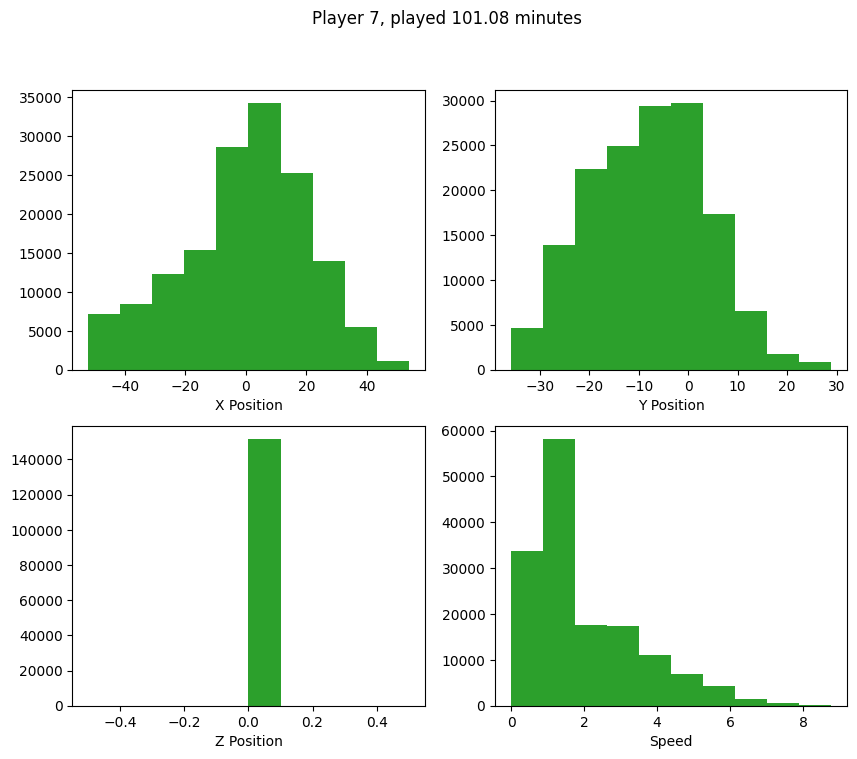

In [34]:
import pickle 
import os
import matplotlib.pyplot as plt
import numpy as np

file = "../RestructuredData_2425/SJE/AllData/Game_LYN_SJE_Score_0_2_Day_2024-12-01Z.pkl"

if os.path.exists(file):
    with open(file, "rb") as f:
        data = pickle.load(f)
else:
    print('meooww')

print(data.columns)

times = data["Times"]
ball = data["Ball"]
FCN = data["SJE"]
opp = data["Opp"]

print(ball[10])

# Given a time value (e.g., 40), find the index in times and get the corresponding values from ball, FCN, and opp

query_time = 51.0  # or any other time you want to query

# Use np.isclose for robust float comparison

# Extract the first element from each tuple in times
times_x = np.array([t[0] for t in times])

# Use np.isclose for robust float comparison
idxs = np.where(np.isclose(times_x, query_time))[0]
if len(idxs) > 0:
    idx = idxs[0]
    print("Index:", idx)
    print("Ball:", ball[idx])
    print("FCN:", FCN[idx])
    print("Opp:", opp[idx])
else:
    print(f"No entry found for time {query_time}")

player_indxes = [2, 6, 7, 8, 10, 13, 15, 17, 24, 25, 36]
player = 7#6, 7, 8, 10, 13, 15, 17, 24, 25, 36
player_indx = player_indxes.index(player)

x_pos = [x[player_indx][0] for x in FCN if x[player_indx][4] == player]
y_pos = [x[player_indx][1] for x in FCN if x[player_indx][4] == player]
z_pos = [x[player_indx][2] for x in FCN if x[player_indx][4] == player]
speed = [x[player_indx][3] for x in FCN if x[player_indx][4] == player]

print(times[-10:-1])

#print(x_pos)                                             
#print(len(x_pos))

fig, ax = plt.subplots(2,2, figsize=(10, 8))
fig.suptitle(f"Player {player}, played {len(x_pos)*0.04/60:.2f} minutes")
ax[0, 0].hist(x_pos, color="tab:green")
ax[0, 0].set_xlabel("X Position")
ax[0, 1].hist(y_pos, color="tab:green")
ax[0, 1].set_xlabel("Y Position")
ax[1, 0].hist(z_pos, color="tab:green")
ax[1, 0].set_xlabel("Z Position")
ax[1, 1].hist(speed, color="tab:green")
ax[1, 1].set_xlabel("Speed")


In [14]:
import numpy as np
import pandas as pd

file_xg = "../RestructuredData_2425/AAB/XGdata/XGdata_AAB_AGF_Score_0_4_Day_2024-08-23Z.txt"
if os.path.exists(file_xg):
    with open(file_xg, "rb") as f:
        data_xg = pd.read_csv(file_xg, delimiter=",", header=None)

file_alldata = "../RestructuredData_2425/AAB/Alldata/Game_AAB_AGF_Score_0_4_Day_2024-08-23Z.pkl" 

if os.path.exists(file_alldata):
    with open(file_alldata, "rb") as f:
        data_all = pickle.load(f)

all_times = data_xg[2]*60+data_xg[3]
print(all_times)

# need: goals = data2[10], mTime_masked = np.array(data3["Times"][mask]), mask = played.astype(bool)

goals = data_xg[10]
mask = np.array([x[5] for x in data_all["Ball"]]).astype(bool)

mTime_masked = np.array(data_all["Times"][mask])

final_frames = np.zeros(len(all_times), dtype=int)
k=0
for target_time in all_times:
    if bool(goals[k]):
        final_frames[k] = [i for i, t in enumerate(mTime_masked) if abs(t[0] -target_time) < 1.1][-1]  
    else:
        for i, t in enumerate(mTime_masked):
            if t[0] - target_time > 1:  #So we take the time of the shot according to XG, and take an extra second
                break
        final_frames[k] = i 
    k+=1

first_frames = final_frames - 11 * 25
print(first_frames) #
print(final_frames) # These are the INDICES in the mTime_masked list!!


C:\Users\nrt\AppData\Local\Temp\ipykernel_48116\1531666848.py:13: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data_all = pickle.load(f)


0       59
1      357
2      829
3      936
4      938
5     1147
6     1880
7     2224
8     2225
9     2369
10    2405
11    2574
12    2937
13    3302
14    3721
15    4157
16    4512
17    5059
dtype: int64
[  535  4233  9676 11722 11770 13258 25309 28492 28499 29156 29585 31664
 34108 44417 49642 55092 59997 65142]
[  810  4508  9951 11997 12045 13533 25584 28767 28774 29431 29860 31939
 34383 44692 49917 55367 60272 65417]


In [38]:
import pickle
import os
import matplotlib.pyplot as plt
from ML_Functions_LoadArrays import *
import numpy as np

def get_xy_from_XG(XGPos1, XGPos2, team):
    if team == 'AAB':
        x = np.array(XGPos1, dtype=float) / 100 * 105 - 52.5  
        y = np.array(XGPos2, dtype=float) / 100 * 70 - 35
    elif team in ['AGF', 'BIF', 'FCK', 'FCN',  'SIF', 'SJE', 'VFF']:
        x = np.array(XGPos1, dtype=float) / 100 * 105 - 52.5  
        y = np.array(XGPos2, dtype=float) / 100 * 68 - 34
    elif team == 'FCM':
        x = np.array(XGPos1, dtype=float) / 100 * 104 - 52  
        y = np.array(XGPos2, dtype=float) / 100 * 65 - 32.5
    elif team in ['LYN', 'RFC']:
        x = np.array(XGPos1, dtype=float) / 100 * 102 - 51  
        y = np.array(XGPos2, dtype=float) / 100 * 65 - 32.5
    elif team == 'VB':
        x = np.array(XGPos1, dtype=float) / 100 * 108 - 54
        y = np.array(XGPos2, dtype=float) / 100 * 68 - 34
    return x, y

def get_shot_time(times_x, t, Us, Ball, XGNumbers, XGPos1, XGPos2, i, verbose=False):
    passed = False
    idxs = np.where(np.isclose(times_x, t, atol=0.03)) #I believe when XGDat says 50 seconds, it means the shot took place between 49-50 seconds, research shows this is usually true, but sometimes the time in XGData is 3 seconds off...
    if len(idxs[0]) == 0:
        if verbose:
            print(f"Warning: No close time found for {t} in times_x.")
        return 0, passed
    
    idxes = idxs[0][0]  # Get the first index where the time is close
    frames = np.arange(max(0 , idxes-40), min(len(Us), idxes+15)) #So we take the whole second, and also half a second before and after, so we take from 48.5-50.5
    for idx in frames:
        if Ball[idx][5] == 0:
             frames = np.delete(frames, np.where(frames == idx)) #take only the idx in which the ball is being played

    if len(frames) == 0: 
        if verbose:
            print(f"Ball not being played.")
        return 0, passed
    
    else:
        shooter = int(XGNumbers[i])
        shooter_x = float(XGPos1[i])
        shooter_y = float(XGPos2[i])
        #print(shooter, shooter_x, shooter_y, t/60)
        shooter_pos_in_data = next((j for j, player_data in enumerate(Us[frames[0]]) if int(player_data[4]) == shooter), None)

        if shooter_pos_in_data is None:
            if verbose:
                print(f"Warning: player {shooter} not found in Us[{frames[0]}]")
            return 0, passed

        distances = np.array([np.sqrt((Us[idx][shooter_pos_in_data][0] - Ball[idx][0])**2 + (Us[idx][shooter_pos_in_data][1] - Ball[idx][1])**2) for idx in frames])
        mask = ((np.abs(np.array([Us[idx][shooter_pos_in_data][0] for idx in frames]) - shooter_x) <= 1.5) &
                (np.abs(np.array([Us[idx][shooter_pos_in_data][1] for idx in frames]) - shooter_y) <= 1.5))
        distances = distances[mask]
        frames = frames[mask]

        if len(distances) == 0:
            if verbose:
                print(f"Warning: player {shooter} not found in Us[{frames[0]}] within 1.5m of where the player is supposed to be.")
            return 0, passed
        
        else : 
            if min(distances) > 2:
                if verbose:
                    print("Ball - Shooter distance > 2")
                return 0, passed
            passed = True
            if verbose:
                print(f"Shot time found at frame {frames[np.argmin(distances)]} with distance {min(distances)}")
           
            return frames[np.argmin(distances)], passed
    
def get_all_xg(Team, verbose=False):
    broken_NamesSC = ['Game_SJE_BIF_Score_2_2_Day_2024-11-24Z.pkl', 'Game_SJE_VFF_Score_2_2_Day_2024-09-01Z.pkl', 'Game_SJE_FCN_Score_1_4_Day_2024-10-06Z.pkl']
    NamesXG, NamesSC = SortGames('pippo', Team)
    columns = ['XG', 'Time', 'Half','ball_x', 'ball_y', 'ball_z', 'ball_speed']
    for i in range(1, 12):
        columns += [f'us_{i}_x', f'us_{i}_y', f'us_{i}_speed']
    for i in range(1, 12):
        columns += [f'them_{i}_x', f'them_{i}_y', f'them_{i}_speed']

    distances_list = []
    rows = []
    for igame in range(1):
        if NamesSC[igame] not in broken_NamesSC:
            Time, Ball, Us, Them = SecLoad(Team, NamesSC, igame)

            XGNumbers, XGTeam, XGValue, XGHalf, XGMin, XGSec, XGTimes, XGPos1, XGPos2 = (
                MacihneLearning_OptaLoad(Team, NamesXG, igame)
            )

            XG_x, XG_y = get_xy_from_XG(XGPos1, XGPos2, NamesSC[igame].split('_')[1])  # Assuming the pitch size is based on the team name in the file

            times_x = np.array([t[0] for t in Time])

            for i, t in enumerate(XGTimes):
                if XGTeam[i] == Team and XGValue[i] > 0:
                  
                        idx, passed = get_shot_time(times_x, t, Us, Ball, XGNumbers, XG_x, XG_y, i, verbose=verbose)

                        if passed:

                            distances = np.array([np.sqrt((Us[idx][j][0] - Ball[idx][0])**2 + (Us[idx][j][1] - Ball[idx][1])**2) for j in range(len(Us[idx]))])
        
                            distances_list.append(min(distances))
                            index_ordered = np.argsort(distances)
                            Us[idx] = Us[idx][index_ordered]
                            distances = np.array([np.sqrt((Them[idx][j][0] - Ball[idx][0])**2 + (Them[idx][j][1] - Ball[idx][1])**2) for j in range(len(Them[idx]))])
                            index_ordered = np.argsort(distances)
                            Them[idx] = Them[idx][index_ordered]
                            row = {
                                'XG': XGValue[i],
                                'Time': XGTimes[i],
                                'Half': XGHalf[i],
                                'ball_x':abs(Ball[idx][0]),
                                'ball_y': Ball[idx][1],
                                'ball_z': Ball[idx][2],
                                'ball_speed': Ball[idx][3],
                            }
                            # Player on the filed
                            for j in range(len(Us[idx])):
                                row[f'us_{j+1}_x'] = Us[idx][j][0]*np.sign(Ball[idx][0])
                                row[f'us_{j+1}_y'] = Us[idx][j][1]
                                row[f'us_{j+1}_speed'] = Us[idx][j][3]
                            for j in range(len(Them[idx])):    
                                row[f'them_{j+1}_x'] = Them[idx][j][0]*np.sign(Ball[idx][0])
                                row[f'them_{j+1}_y'] = Them[idx][j][1]
                                row[f'them_{j+1}_speed'] = Them[idx][j][3]
                            # Filling the rest of the row with NaN
                            if len(Us[idx]) < 11:
                                for j in range(len(Us[idx]), 11):
                                    row[f'us_{j+1}_x'] = np.nan
                                    row[f'us_{j+1}_y'] = np.nan
                                    row[f'us_{j+1}_speed'] = np.nan
                            if len(Them[idx]) < 11:
                                for j in range(len(Them[idx]), 11):
                                    row[f'them_{j+1}_x'] = np.nan
                                    row[f'them_{j+1}_y'] = np.nan
                                    row[f'them_{j+1}_speed'] = np.nan
                            rows.append(row)

    total_XG_data = pd.DataFrame(rows, columns=columns)
    return total_XG_data, distances_list

dist_l = []
tXG_all, dist_list = get_all_xg('AAB', verbose=False) #1 team takes +- 1 min,  
print("Team AAB done")
dist_l += dist_list
#
#for team in ['AGF', 'BIF', 'FCK', 'FCM', 'FCN', 'LYN', 'RFC', 'SIF', 'SJE', 'VB', 'VFF']:
#    tXG, d_l = get_all_xg(team) 
#    print(f"Team {team} done")
#    dist_l += d_l
#    tXG_all = pd.concat([tXG_all, tXG], ignore_index=True)
#print(tXG_all.shape)

#I dont know if y is correct, as i dont know what they did wrt the flipping of the halfs

LEN 30
Team AAB done


6
Number of distances < 2: 6


Text(0, 0.5, 'Frequency')

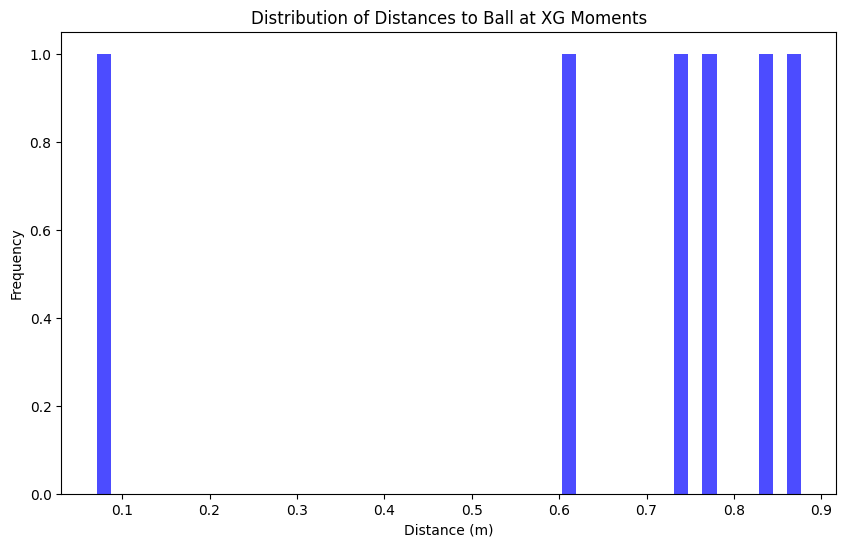

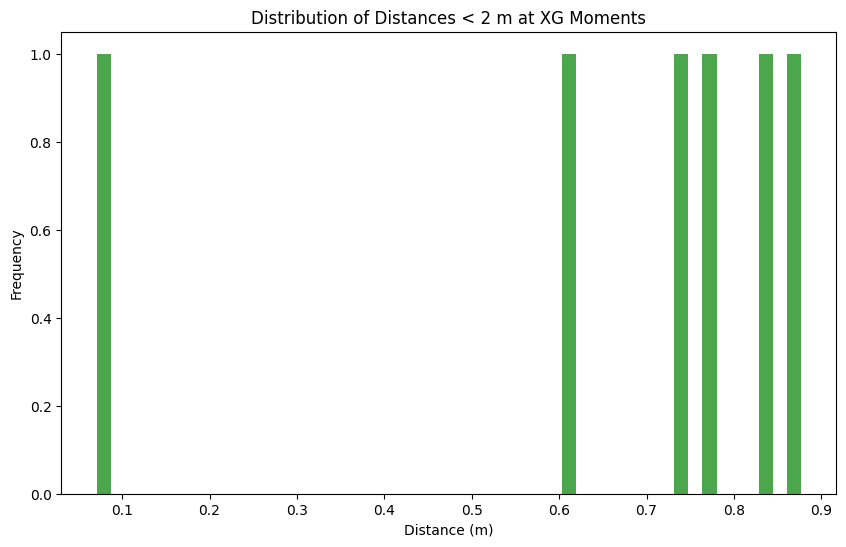

In [37]:
tXG_all.to_csv("all_XG_data.csv", index=False)

tXG_all.head(10)

distances = np.array(dist_l)
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Distances to Ball at XG Moments')
plt.xlabel('Distance (m)')
plt.ylabel('Frequency')

print(len(distances))
dist_mask = distances < 2
print(f"Number of distances < 2: {np.sum(dist_mask)}")
dist_below_2 = distances[dist_mask]
plt.figure(figsize=(10, 6))
plt.hist(dist_below_2, bins=50, color='green', alpha=0.7)
plt.title('Distribution of Distances < 2 m at XG Moments')
plt.xlabel('Distance (m)')
plt.ylabel('Frequency')

0 0.7513321502504741


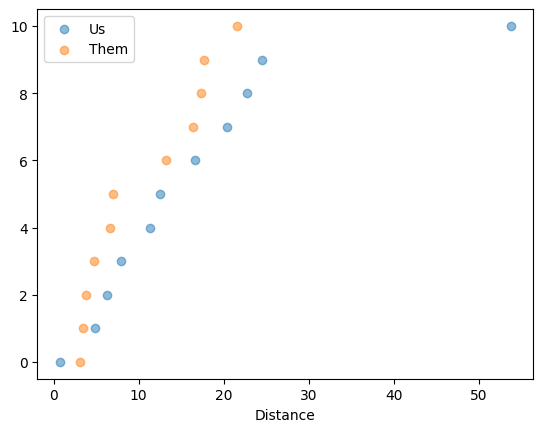

1 0.6209669878503989


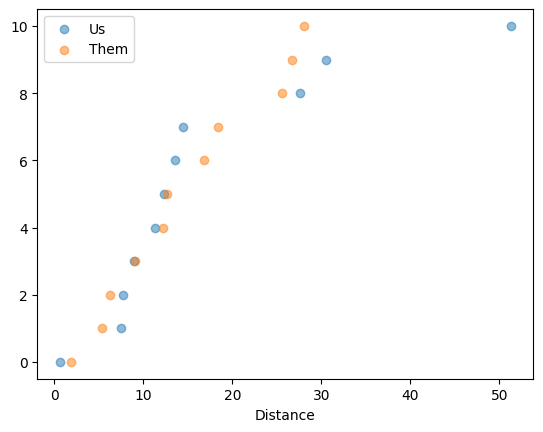

2 0.9002221947941504


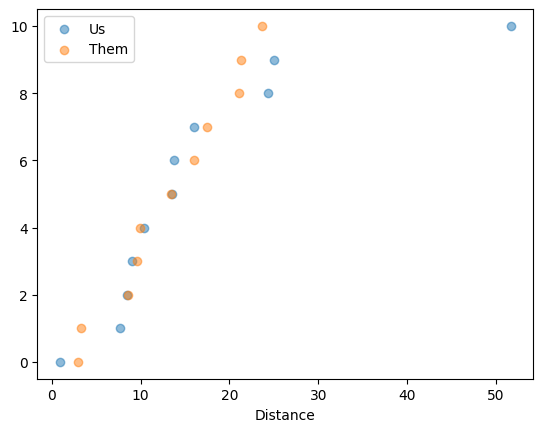

3 1.1837651794169297


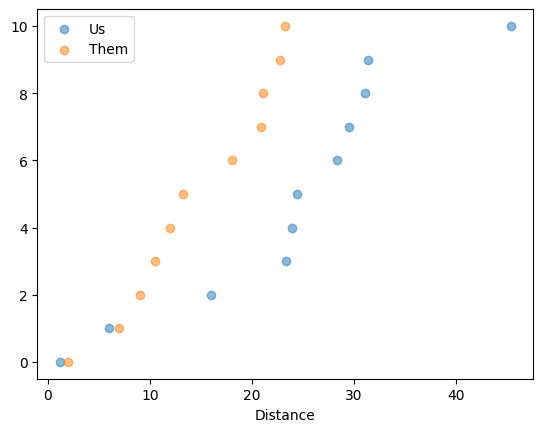

4 0.6657326790837256


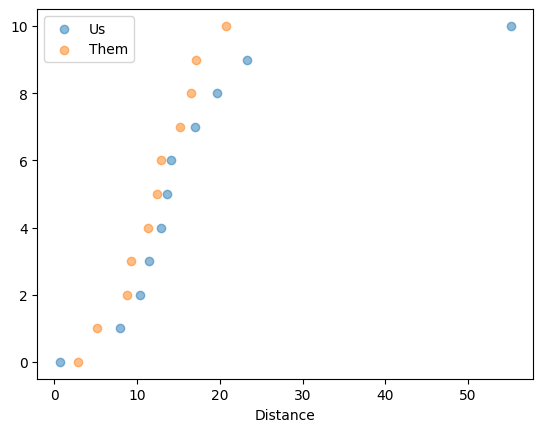

5 0.38013155617496397


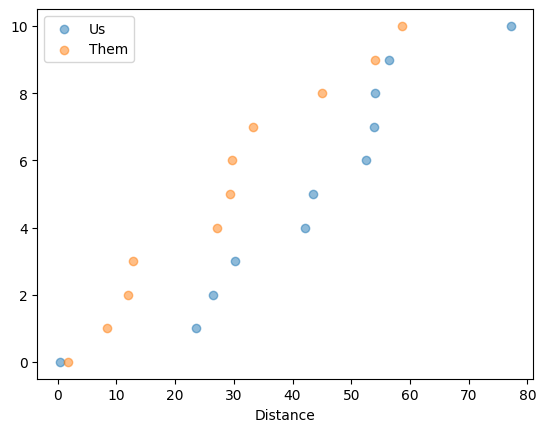

6 0.07071067811865199


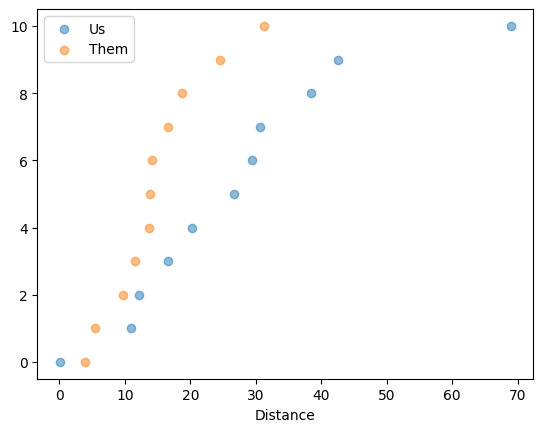

7 1.704846034103961


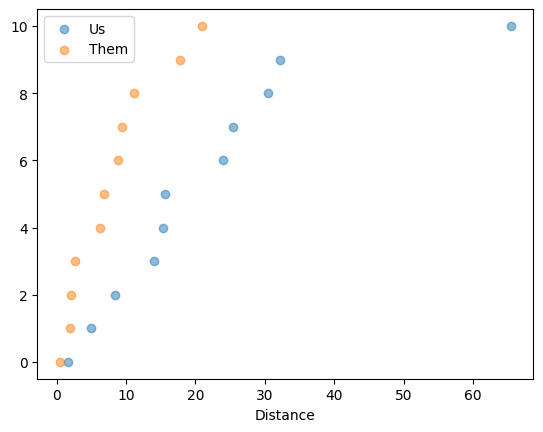

8 1.1035397591387464


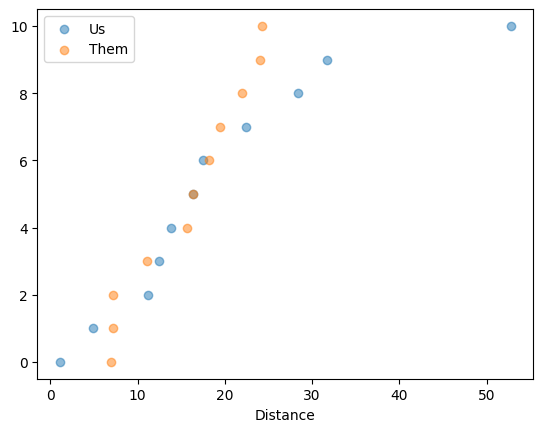

9 3.910856683643621


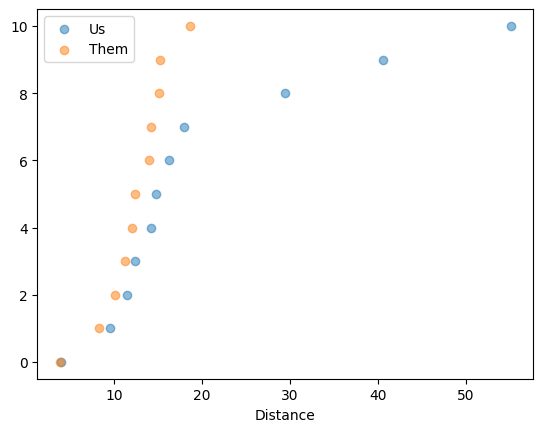

10 1.645752107700307


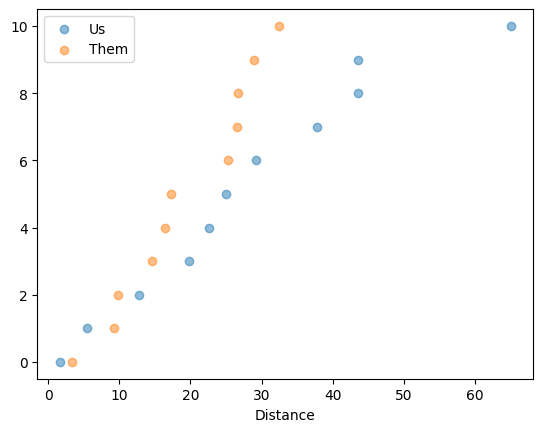

11 0.2865309756378849


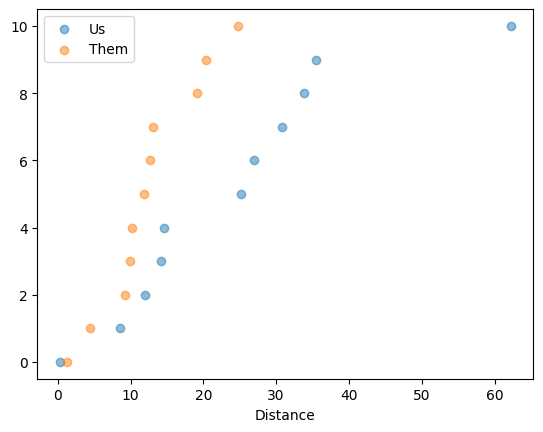

12 0.774661216274578


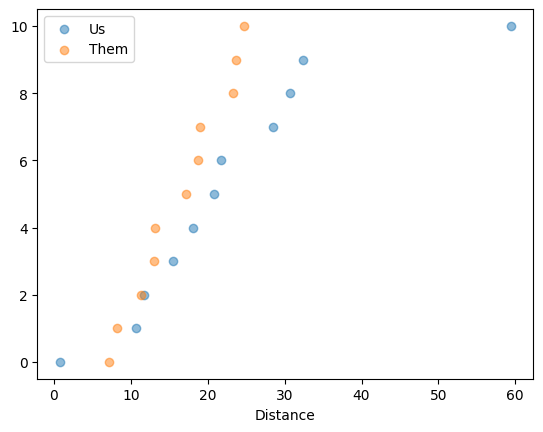

13 0.6072890580275591


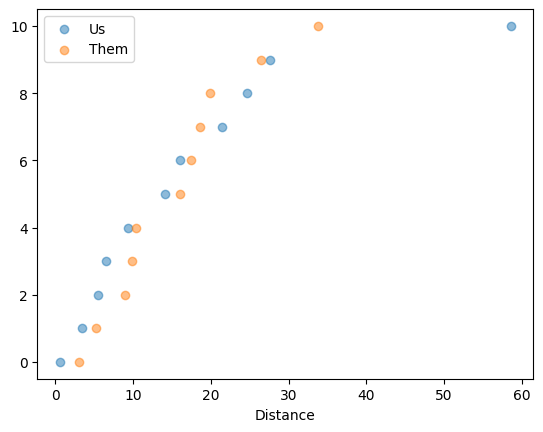

14 0.9701546268507929


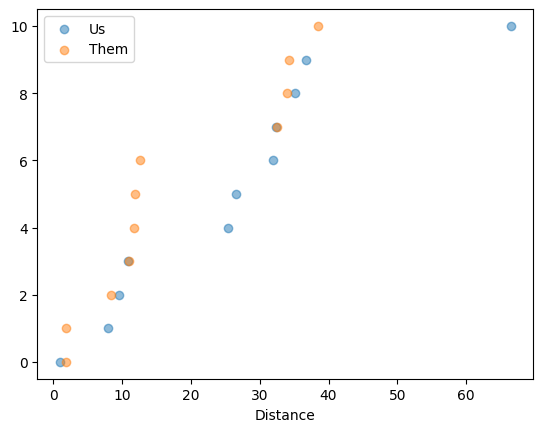

15 0.992975326984513


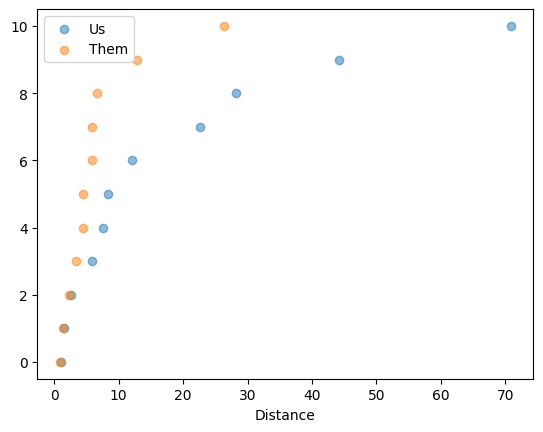

16 0.39115214431215695


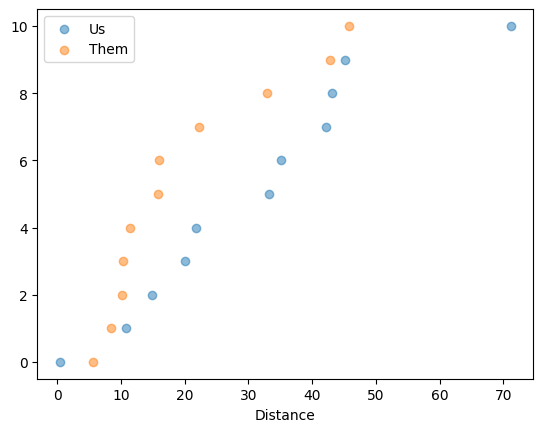

17 0.42485291572495976


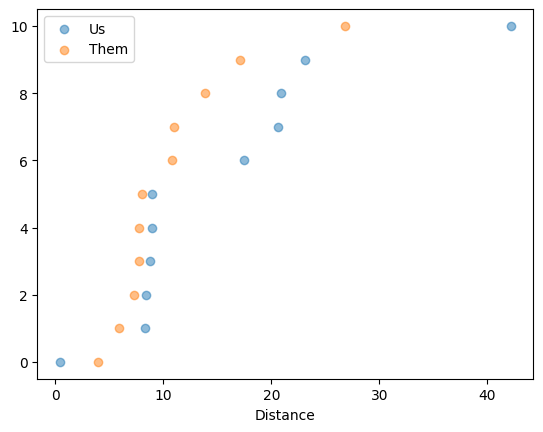

18 2.4795160818191904


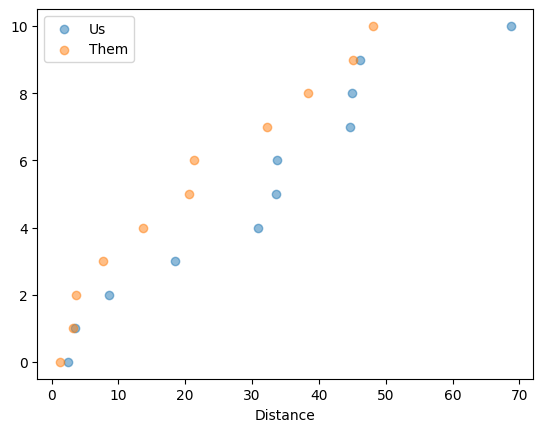

19 1.020784012413988


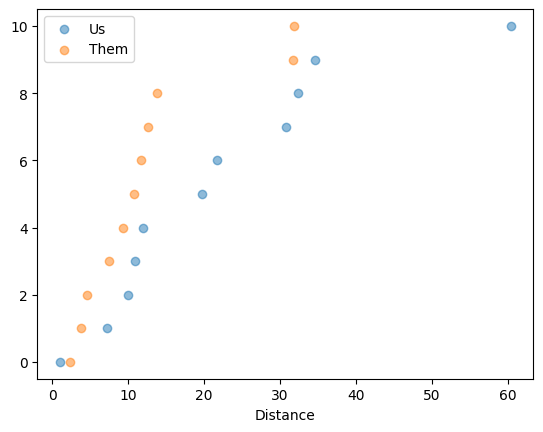

20 0.29068883707497123


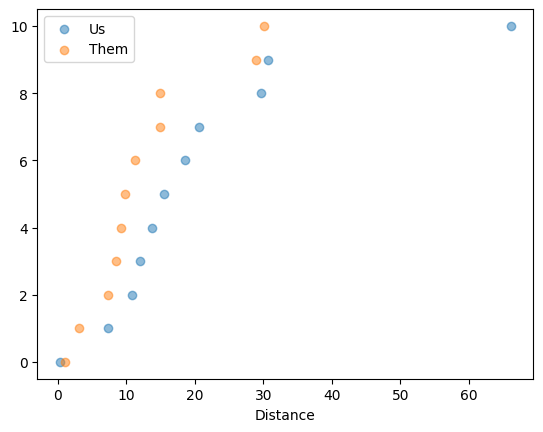

21 0.8193289937503725


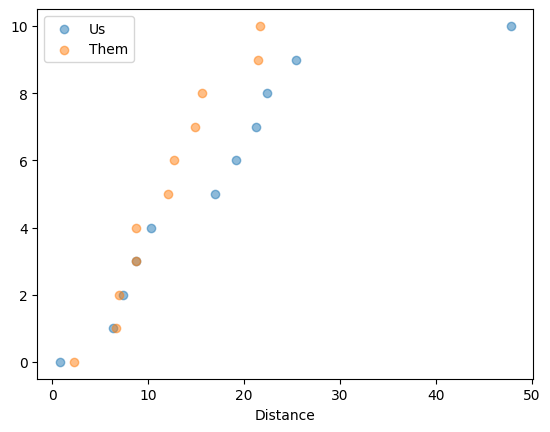

22 0.9700515450222209


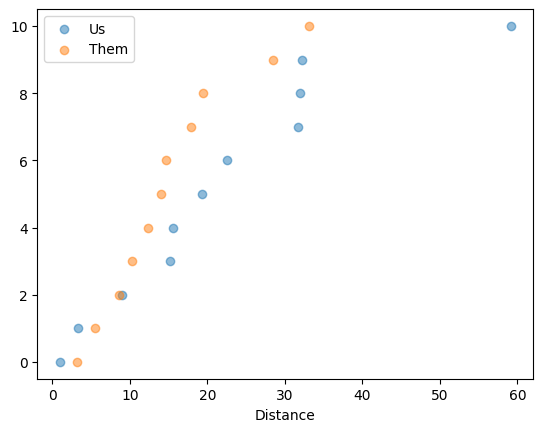

23 0.7382411530116686


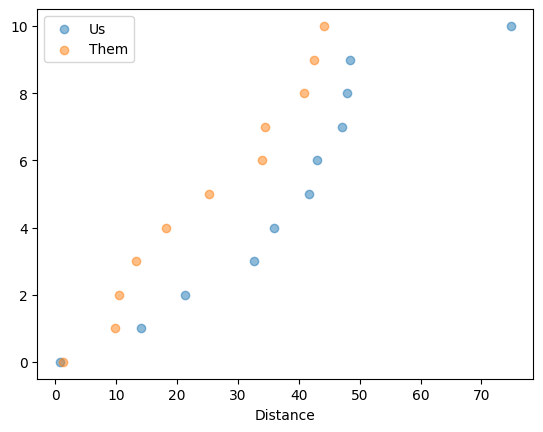

24 1.0748953437428206


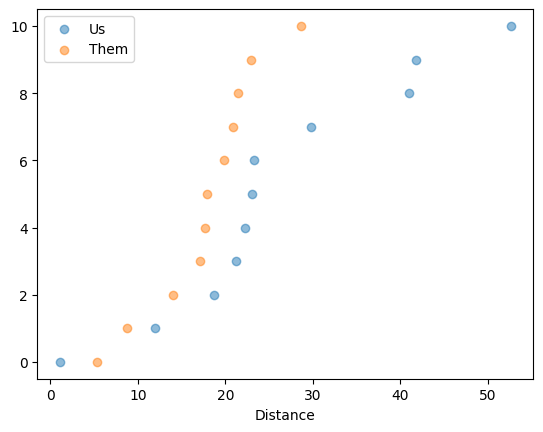

25 1.500466594096649


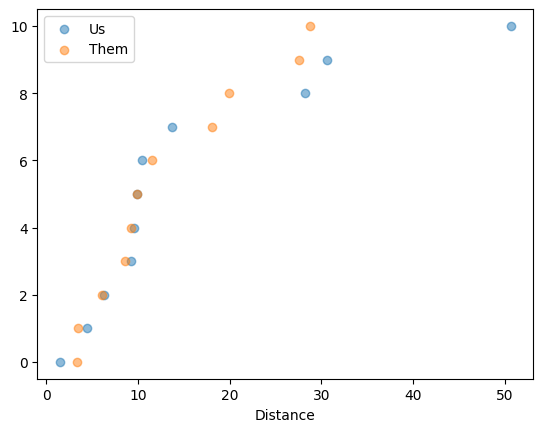

26 0.7316419889536201


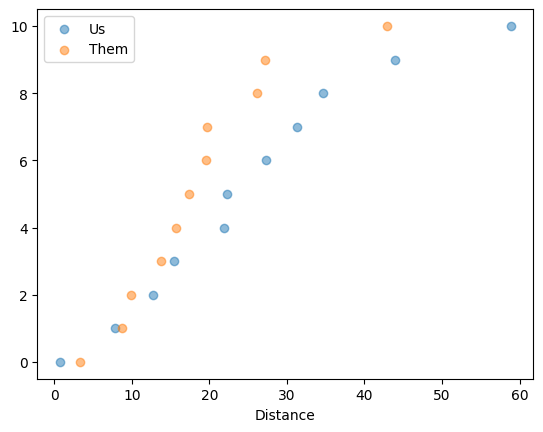

27 0.7595393340703305


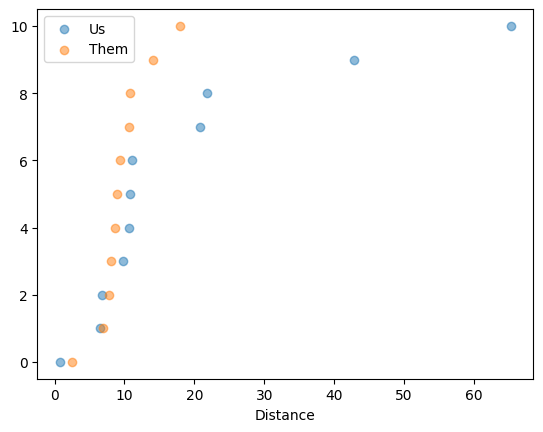

28 1.4900335566691116


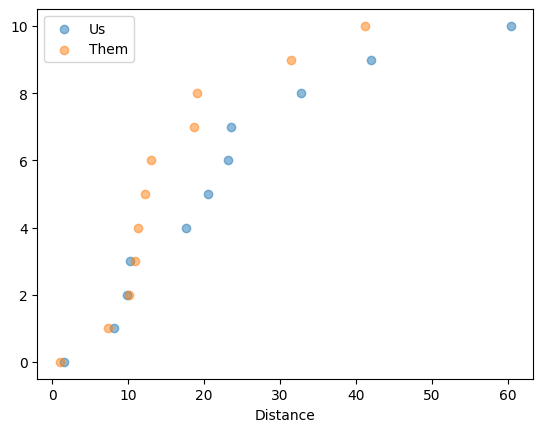

29 1.3298120167903433


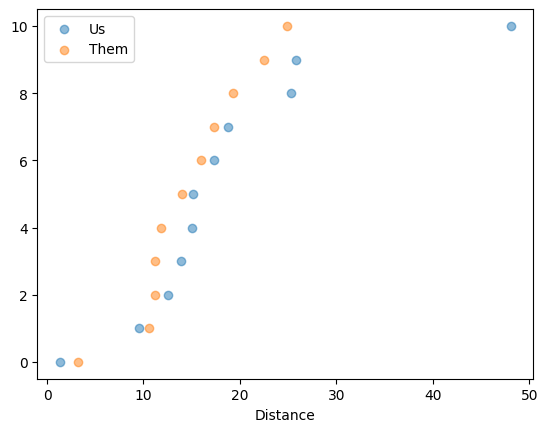

30 0.5885575587824867


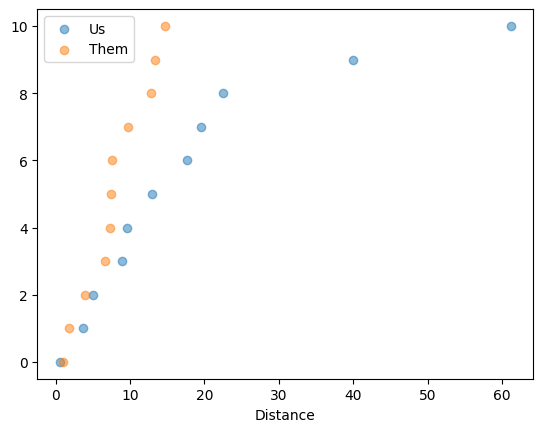

31 0.5939696961966948


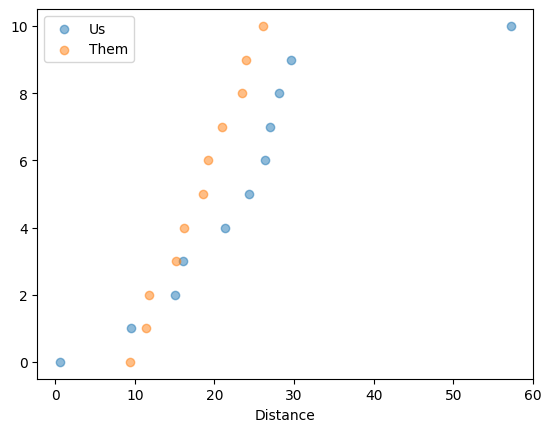

32 0.7071067811865476


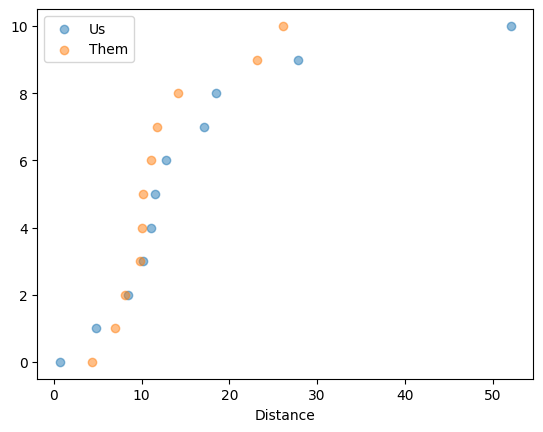

33 0.799312204335707


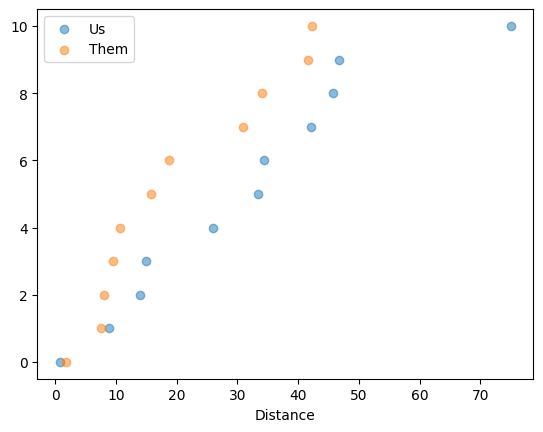

34 1.5532224567009072


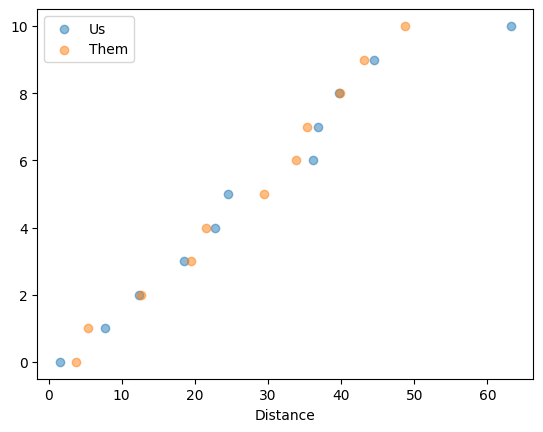

35 1.41439032802123


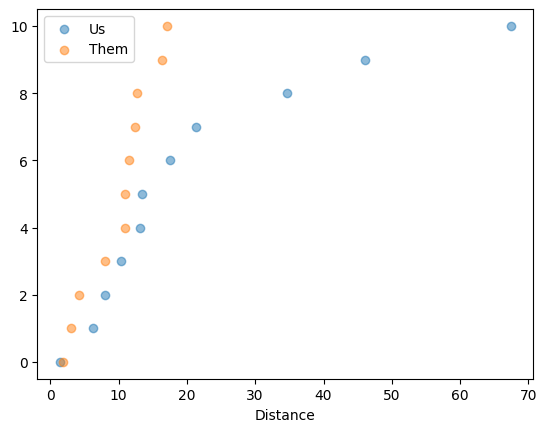

36 0.7839005038906389


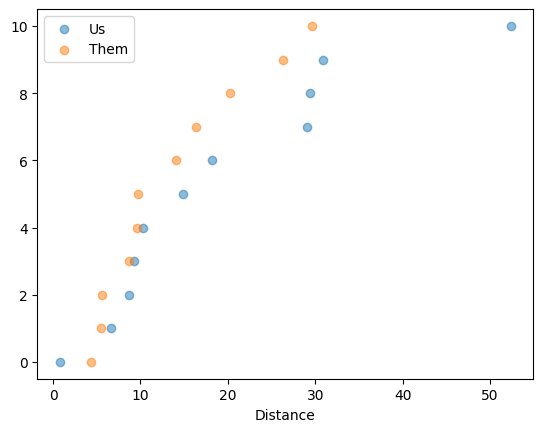

37 0.15297058540778377


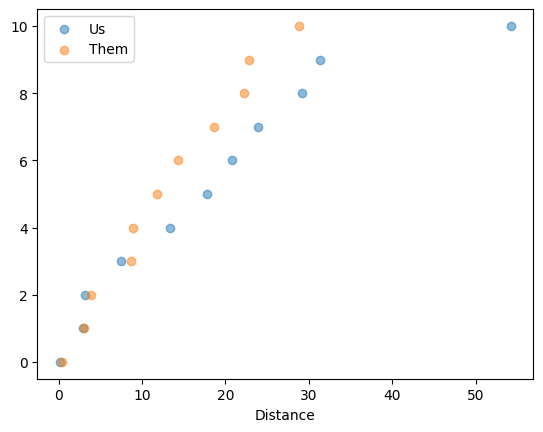

38 0.8542833253669402


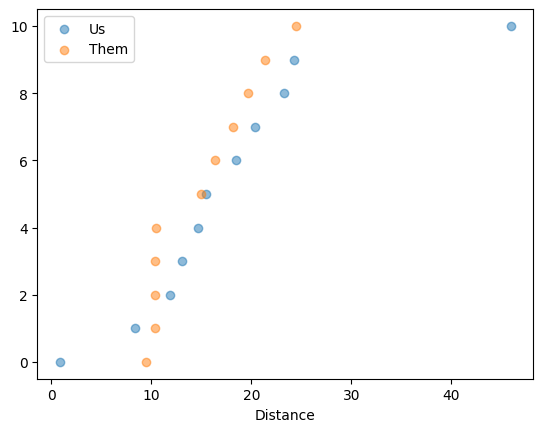

39 0.7960527620704555


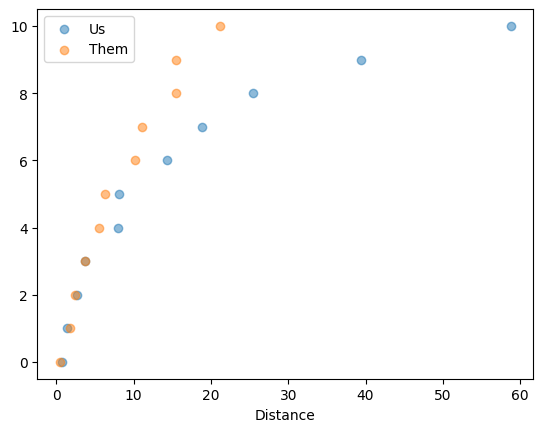

40 0.7683749084919432


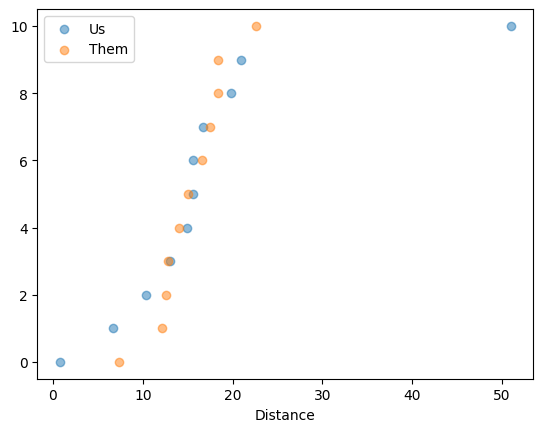

41 9.075048209238341


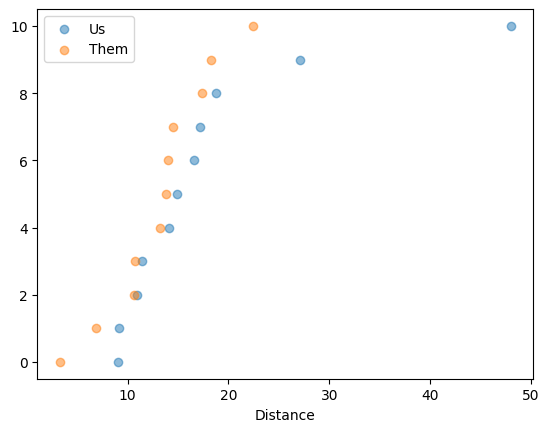

42 0.5510898293381941


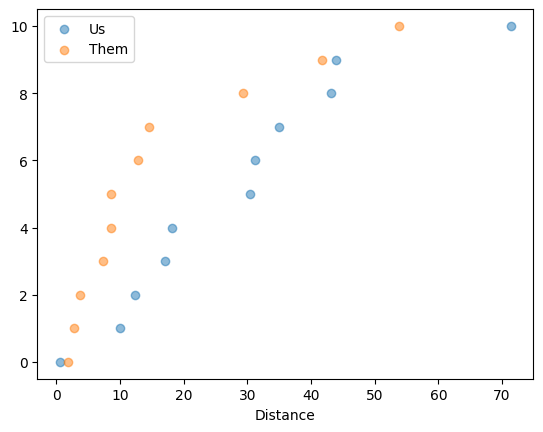

43 1.3103434664239755


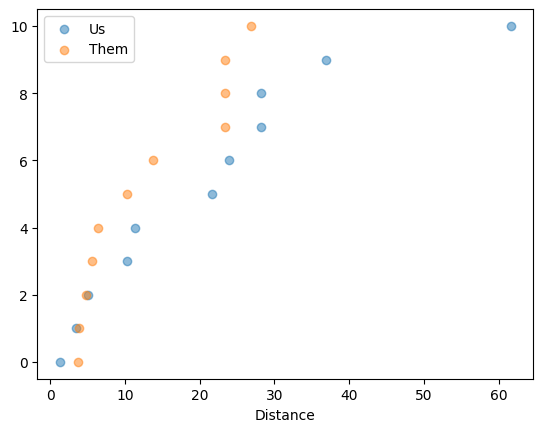

44 0.8709764635166614


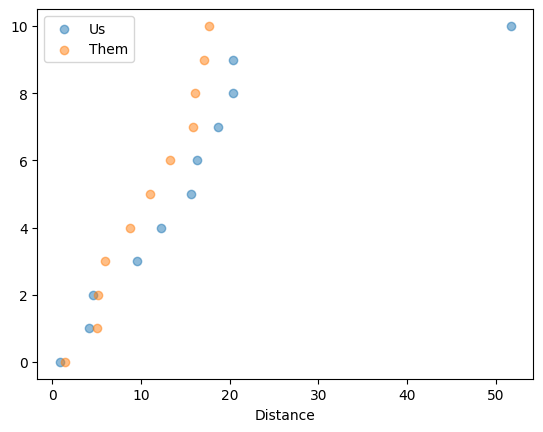

45 1.2200409829181973


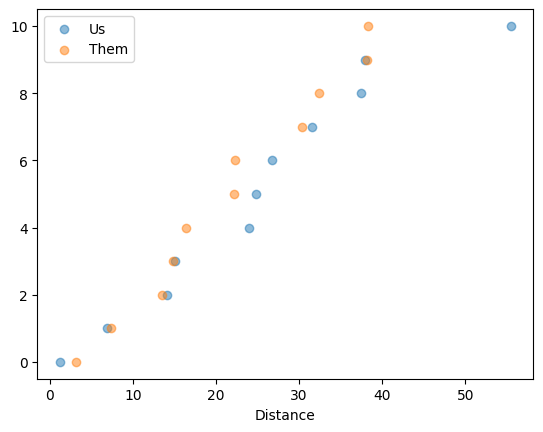

46 0.5197114584074546


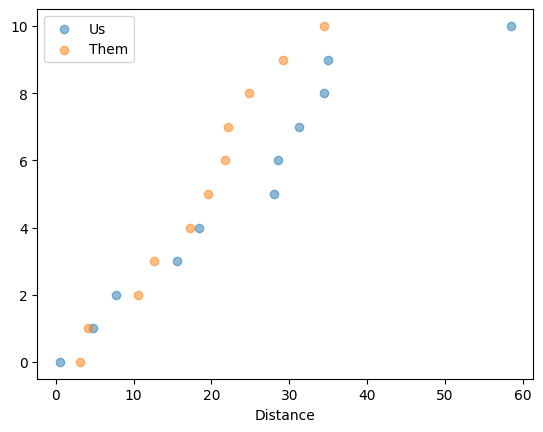

47 1.3243866504914639


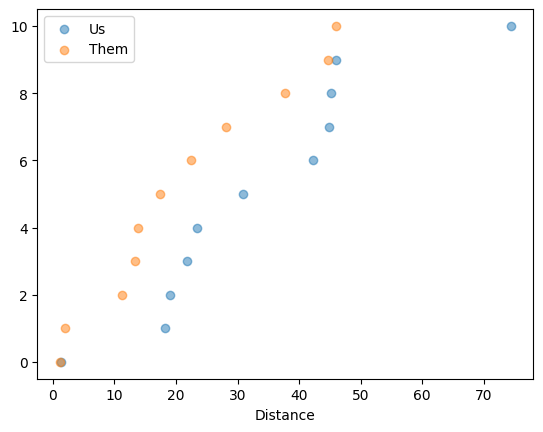

48 0.5263078946776297


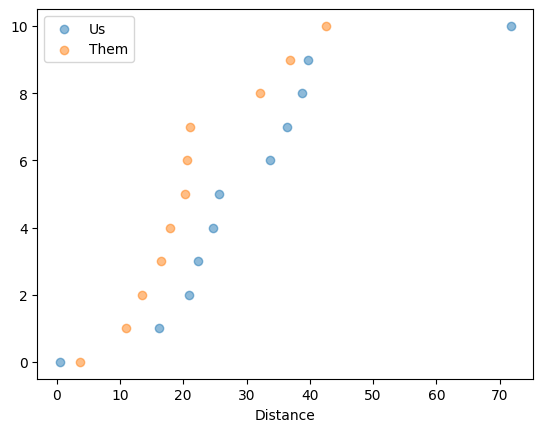

49 0.6109828148156046


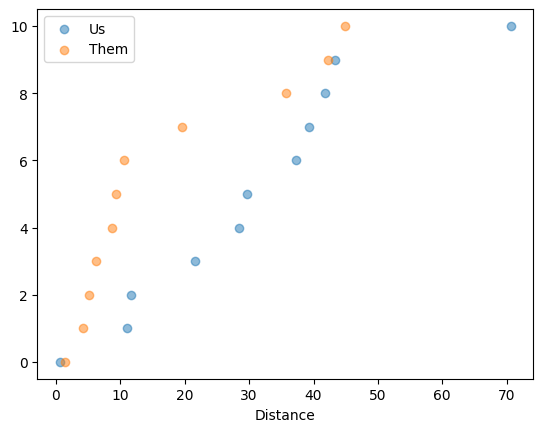

50 0.6862215385719087


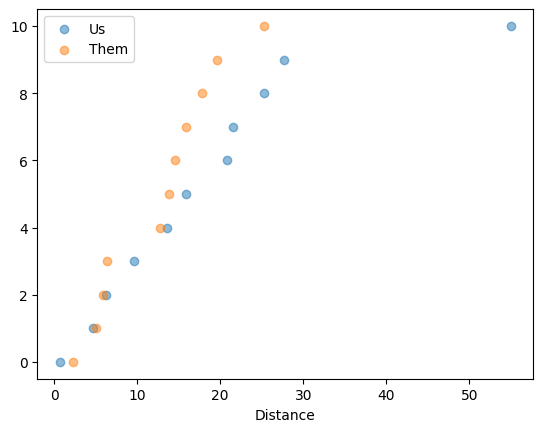

51 0.6594694837519017


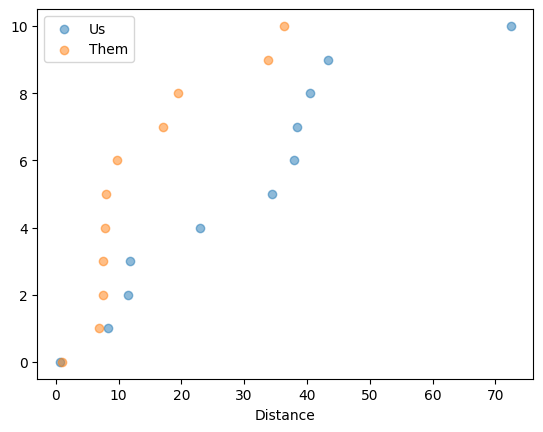

52 0.6744627491566899


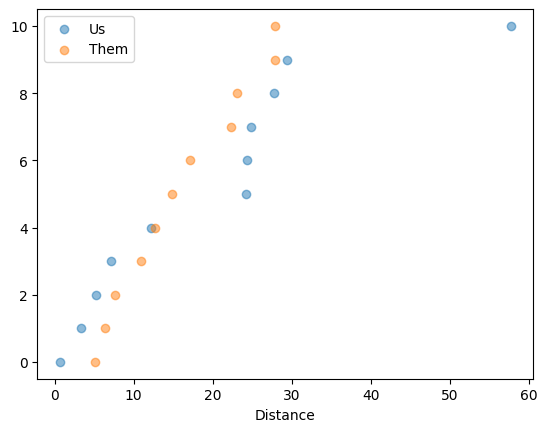

53 0.4517742799230635


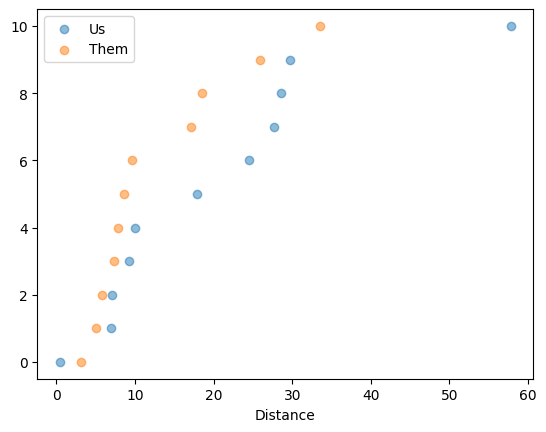

54 0.2785677655436818


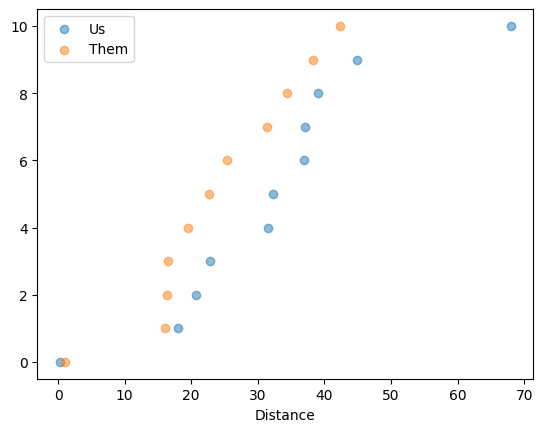

55 2.742353004264768


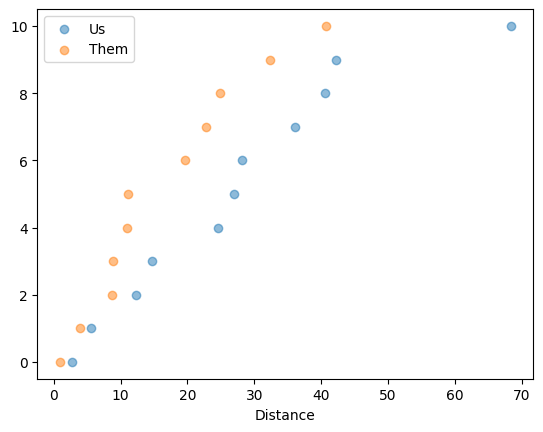

56 1.4736349615830924


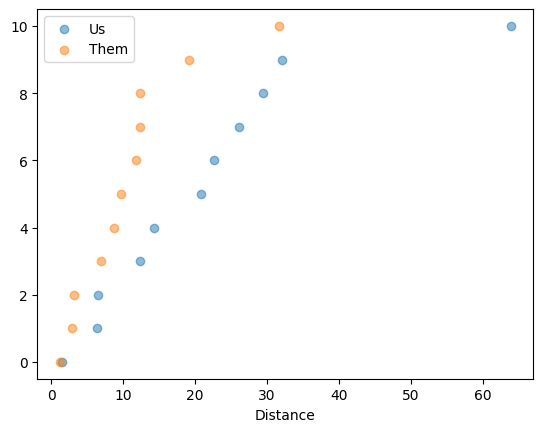

57 0.9027181176868


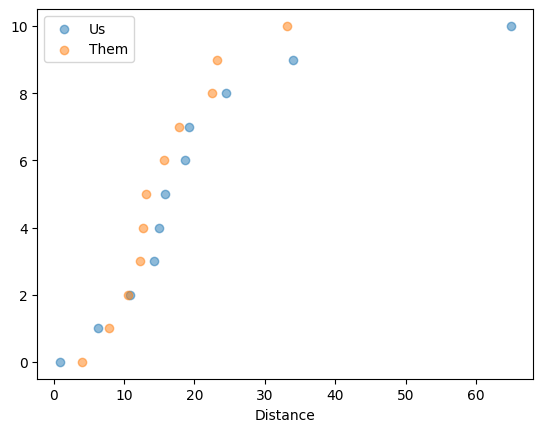

58 0.47518417482066777


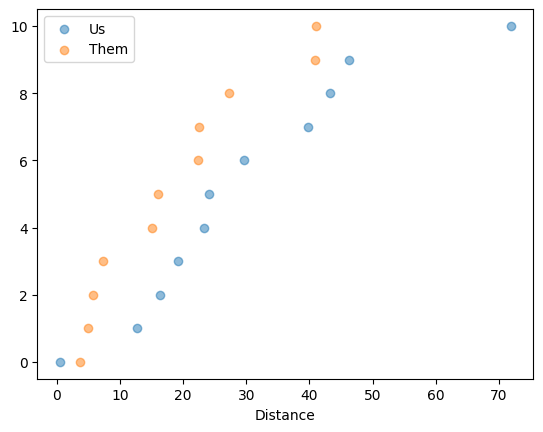

59 0.9621330469326973


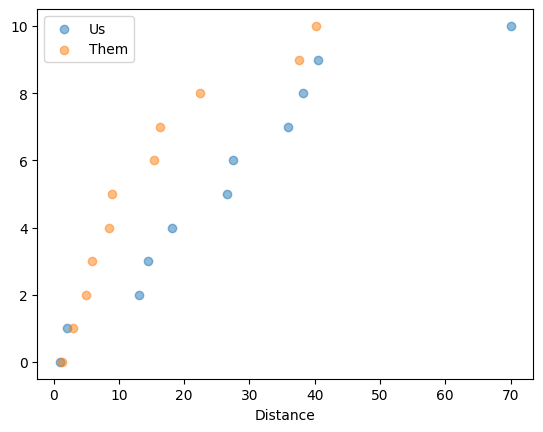

60 1.5208221460775777


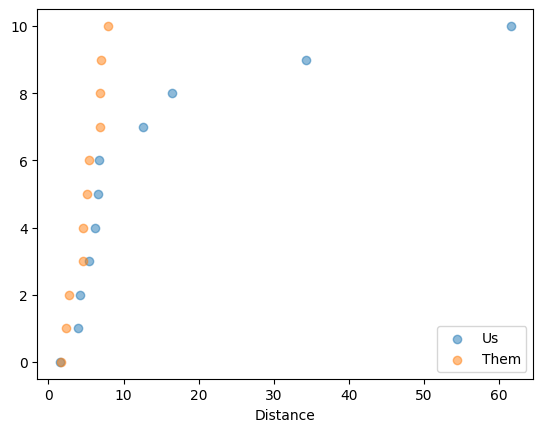

61 1.7461385970191488


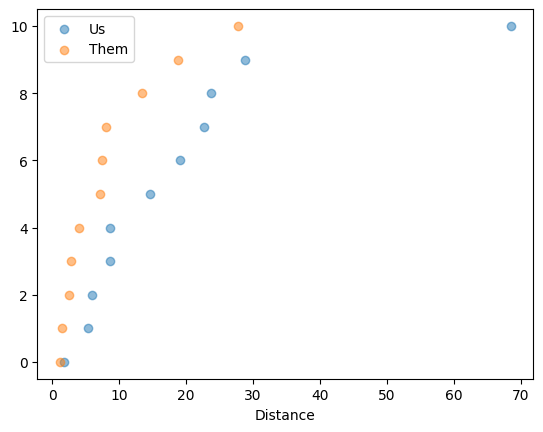

62 0.7402702209328691


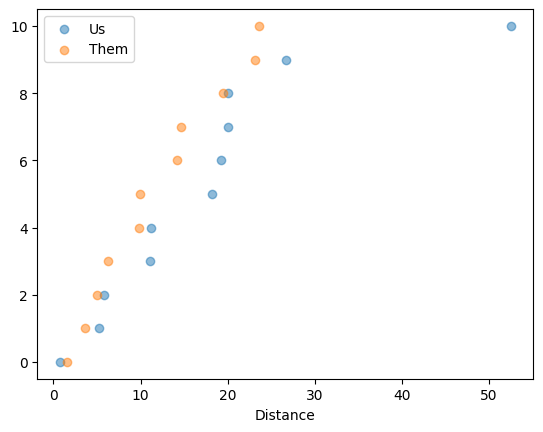

63 4.427188724235731


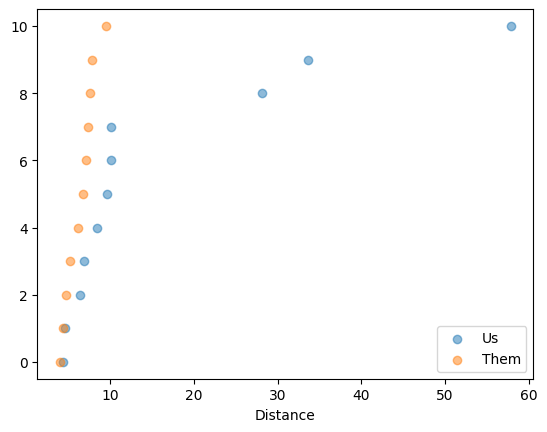

64 5.410813247562699


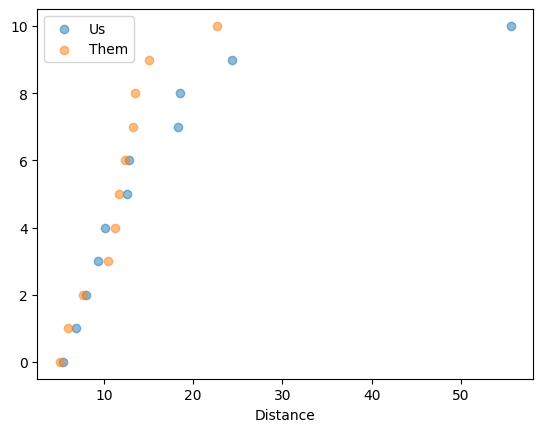

65 1.061037228376083


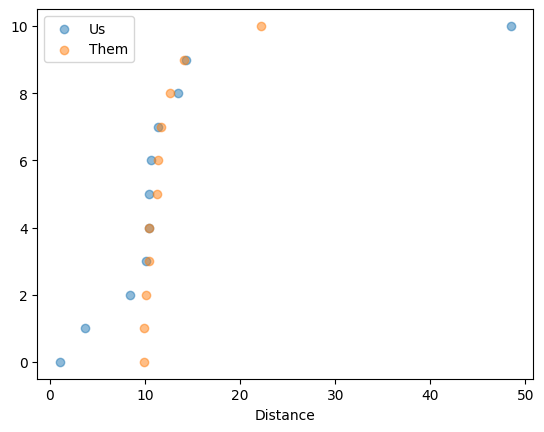

66 1.5281688388394763


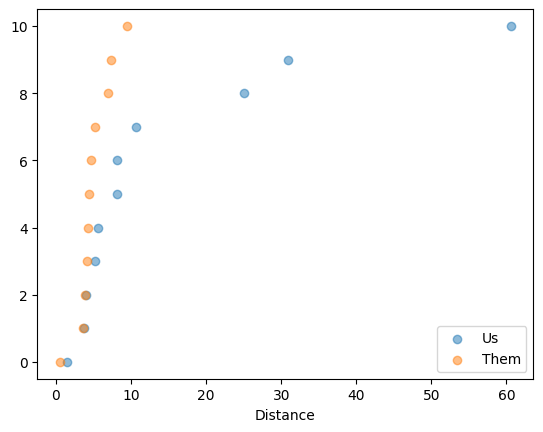

67 1.2088010589009264


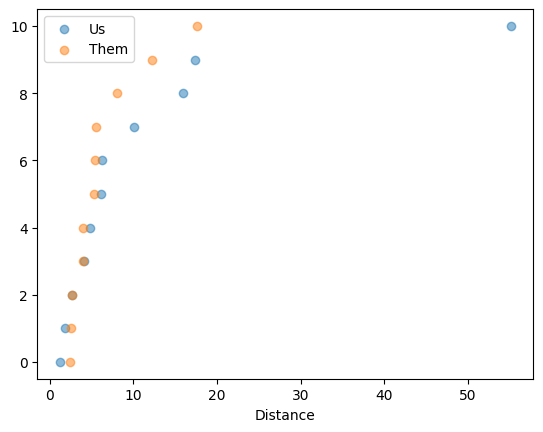

68 1.0456098698845562


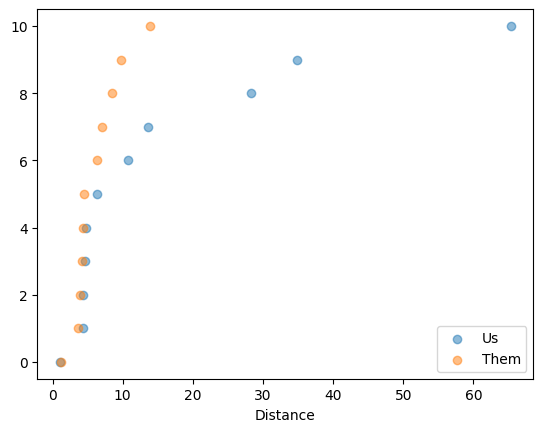

69 0.4964876634922554


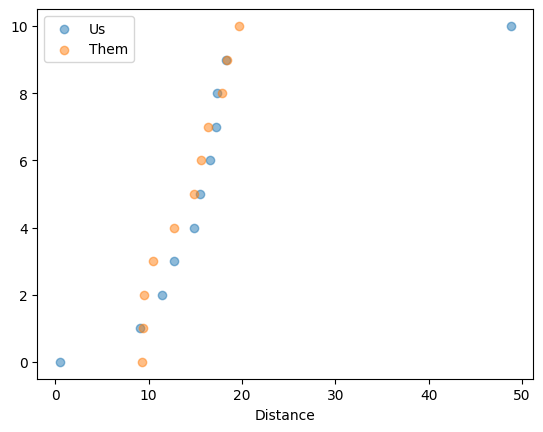

70 0.36878177829171666


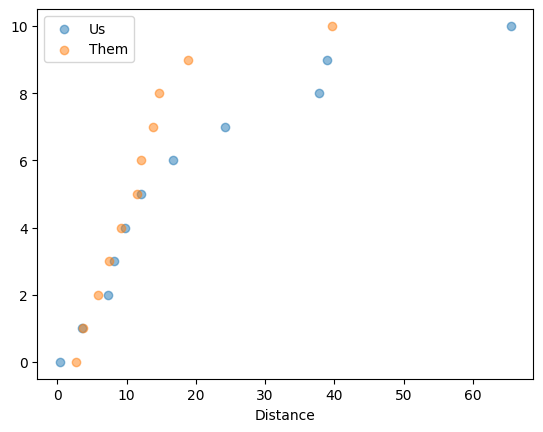

71 0.5578530272392535


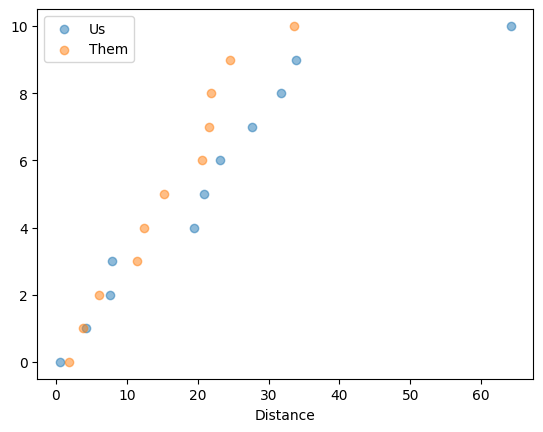

72 0.4617358552246091


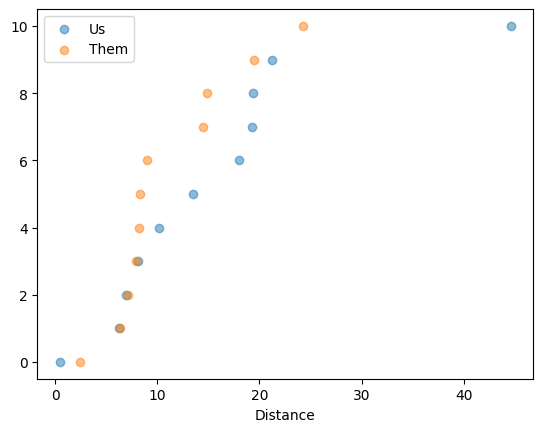

73 1.4806079832285053


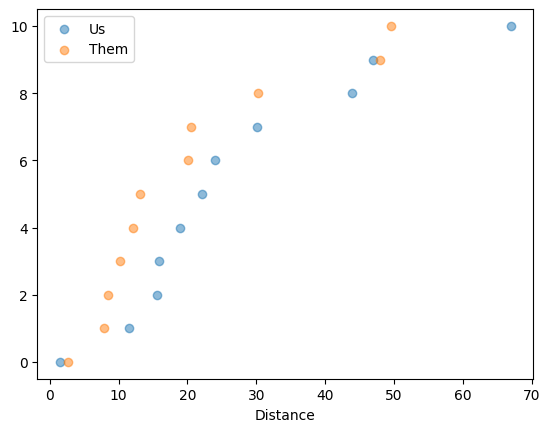

74 1.1649892703368556


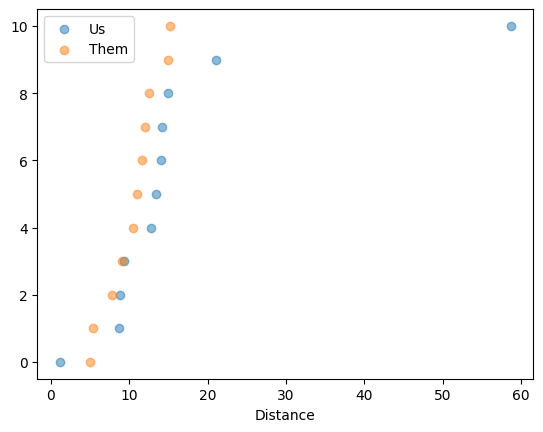

75 0.8620904824900916


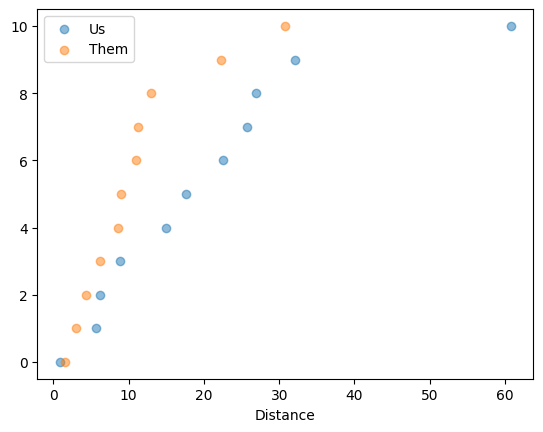

76 1.1548592987892492


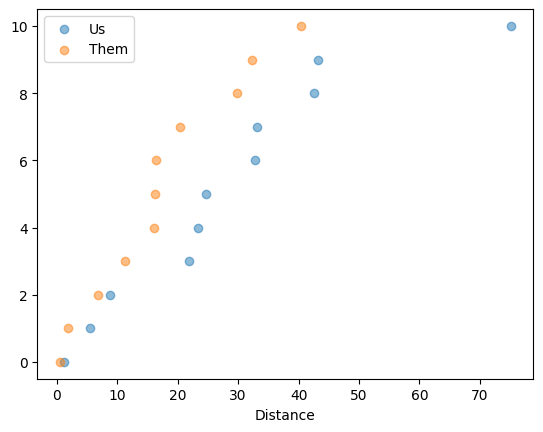

77 0.6107372593841011


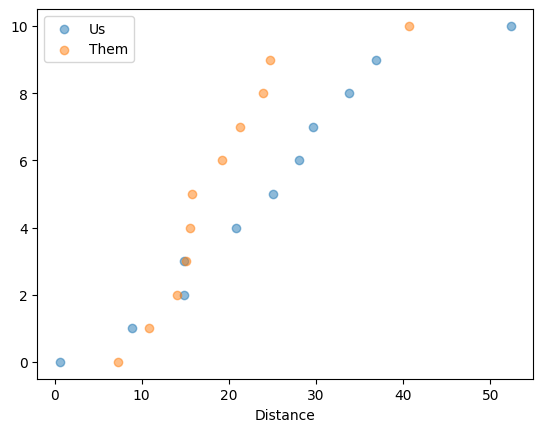

78 0.8121576201698789


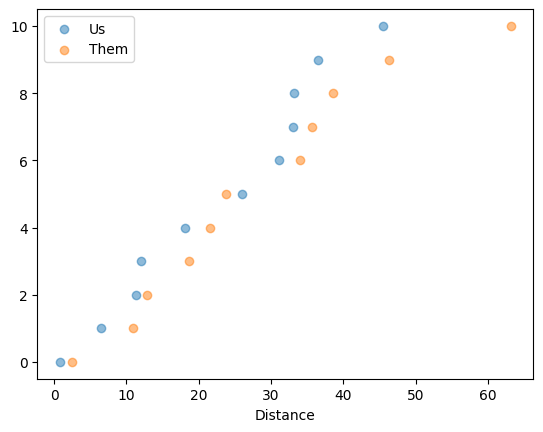

79 3.408988119662491


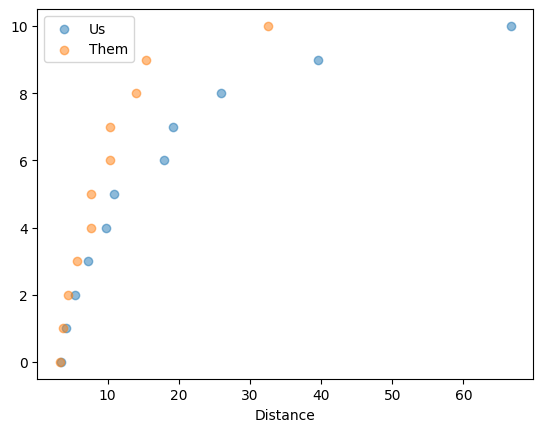

80 0.9726767191621274


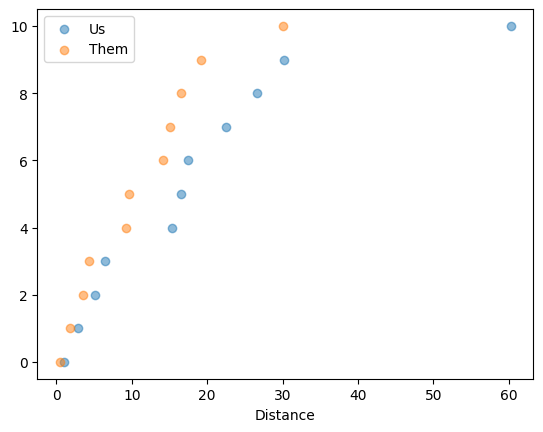

81 0.4085339643163127


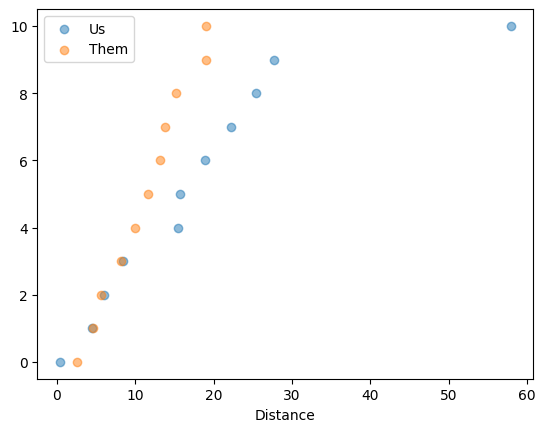

82 0.28017851452243603


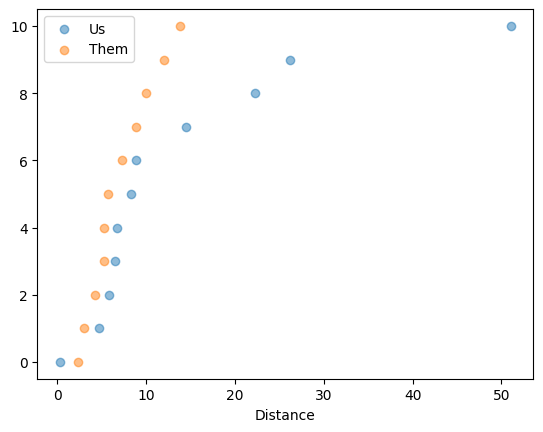

83 0.9626006440887112


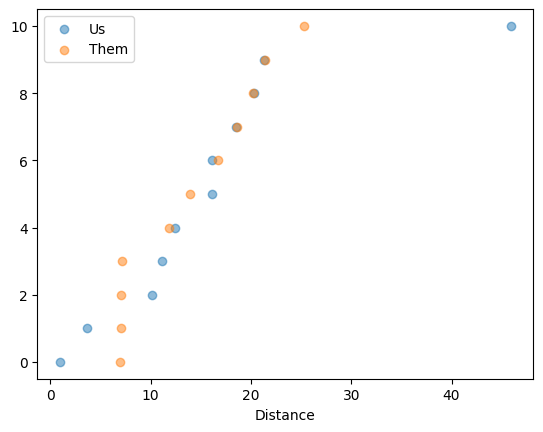

84 1.3624243098242192


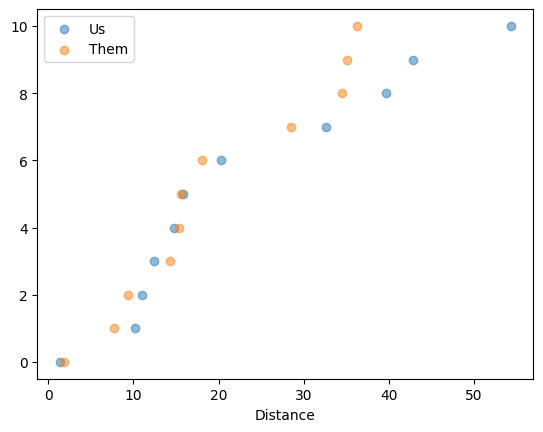

85 1.415238495802031


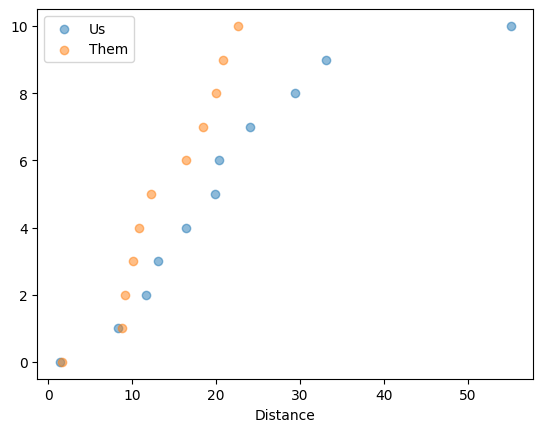

86 0.7144928271158466


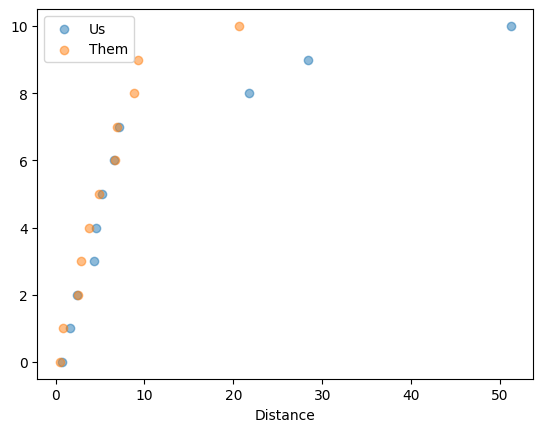

87 0.602079728939615


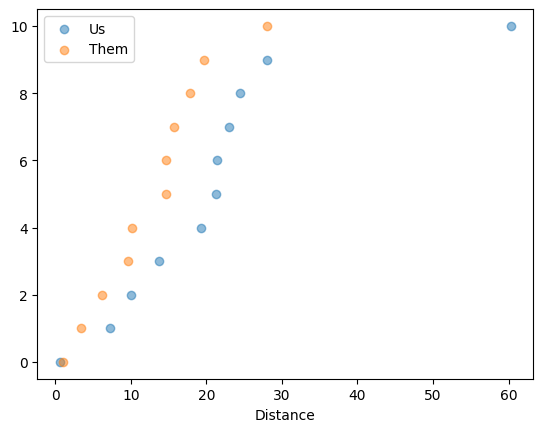

88 0.7256721022610703


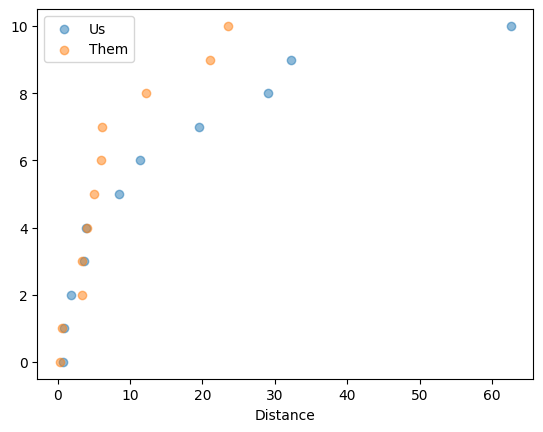

89 0.6315061361538773


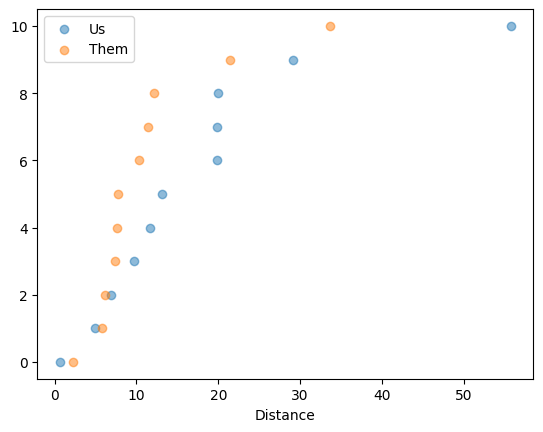

90 3.132491021535418


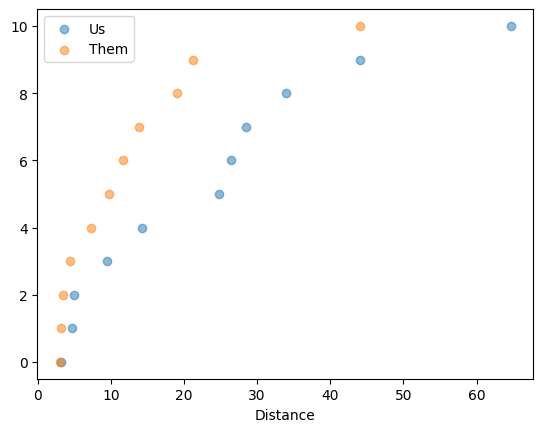

91 0.7022819946431778


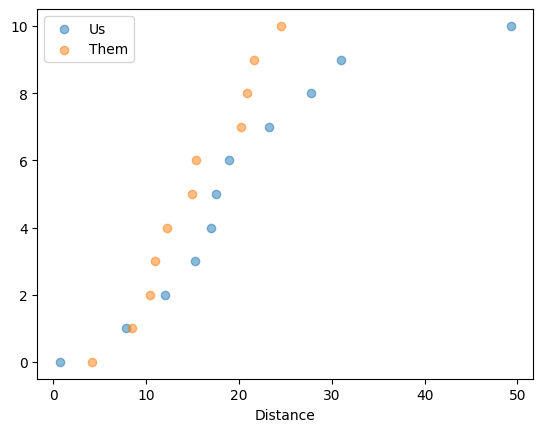

92 0.7962411694957774


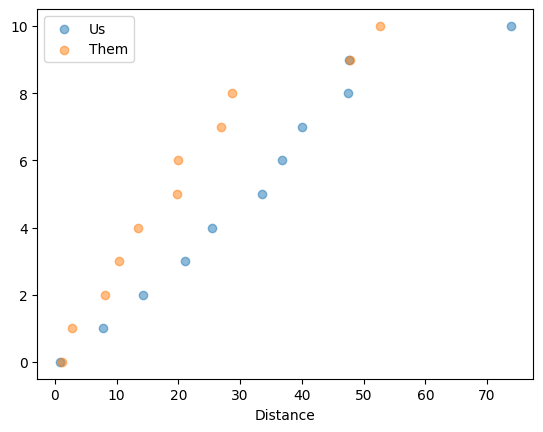

93 2.3369424468736923


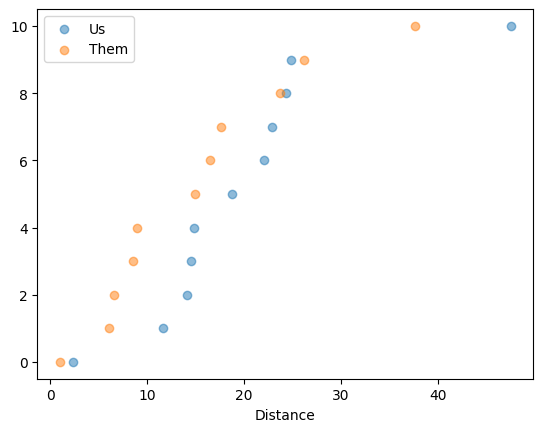

94 1.046613586764476


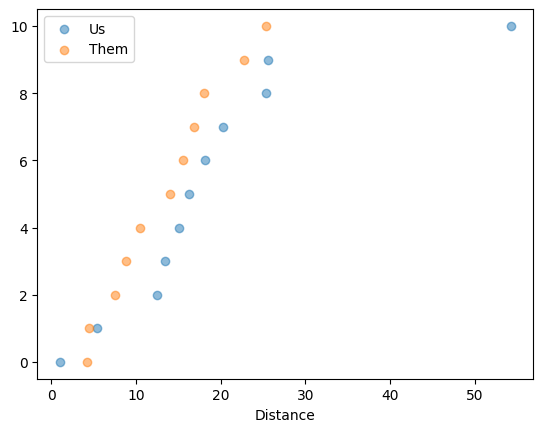

95 0.14999999999999858


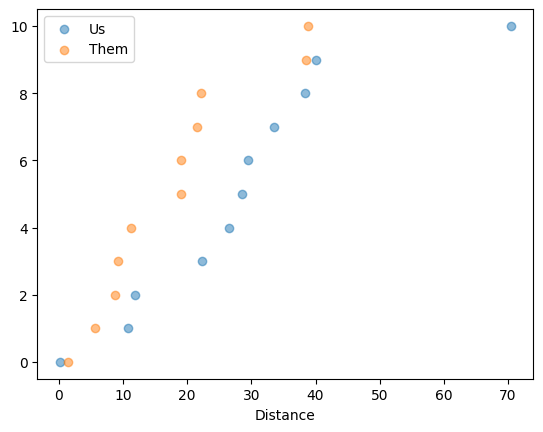

96 1.320946630261798


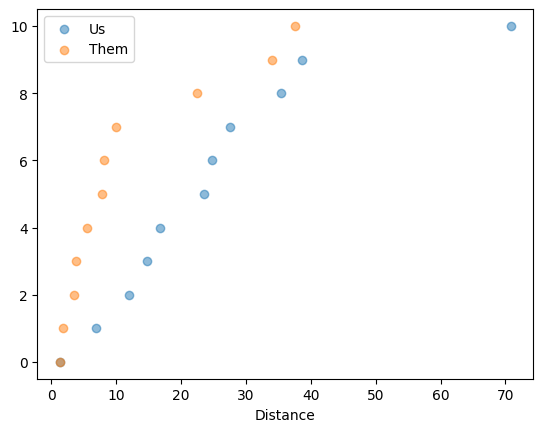

97 0.61


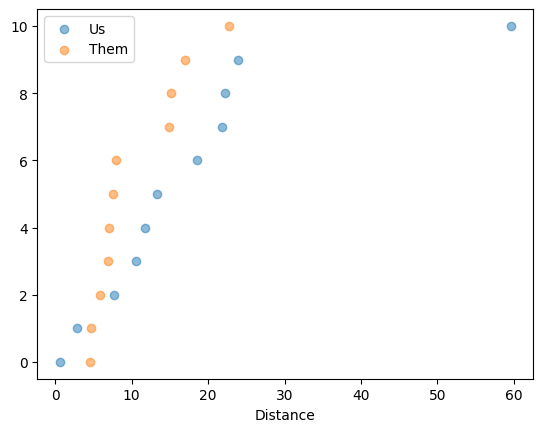

98 0.8928605714219872


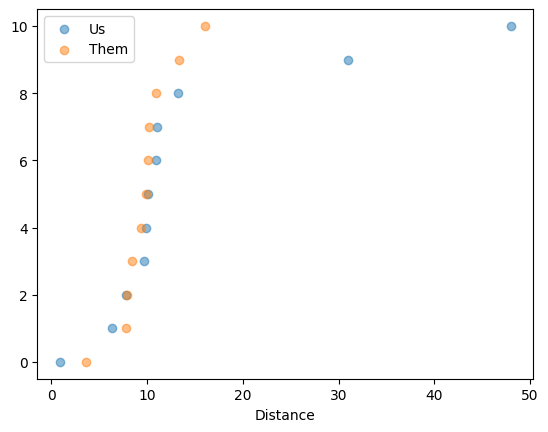

99 0.5968249324550692


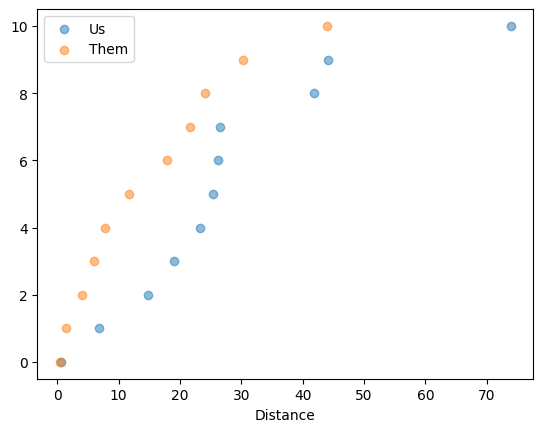

100 0.8609297300012352


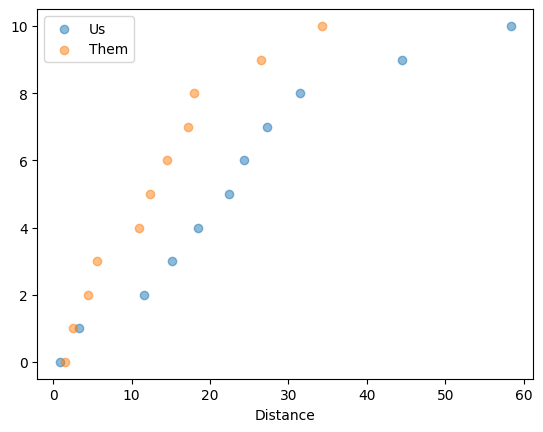

101 1.2200409829181964


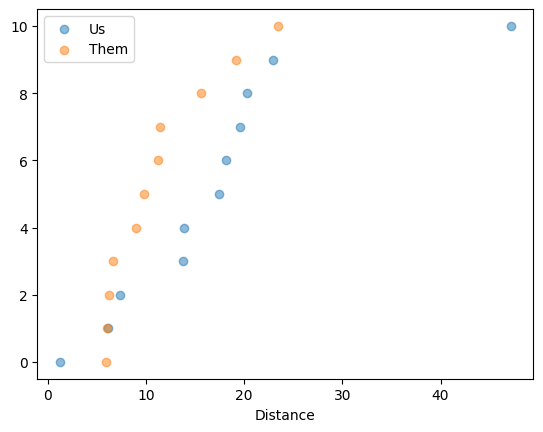

102 0.629364759102377


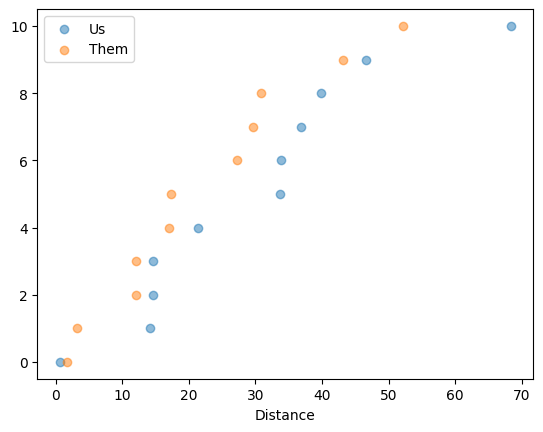

103 0.600832755431993


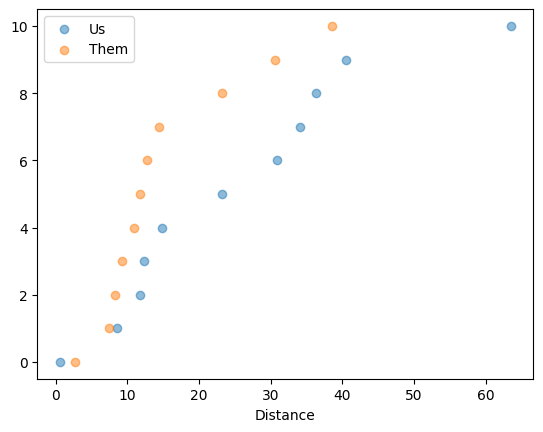

104 0.5348831648126531


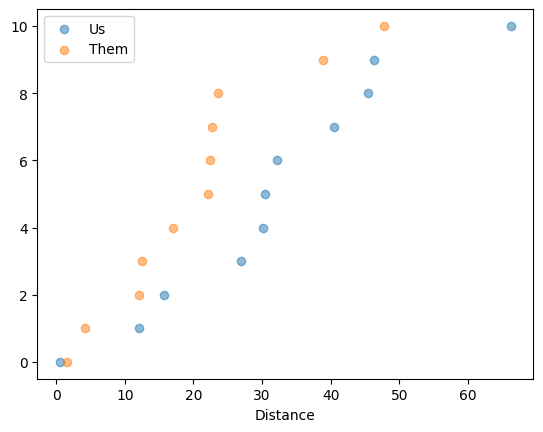

105 0.9204890004774636


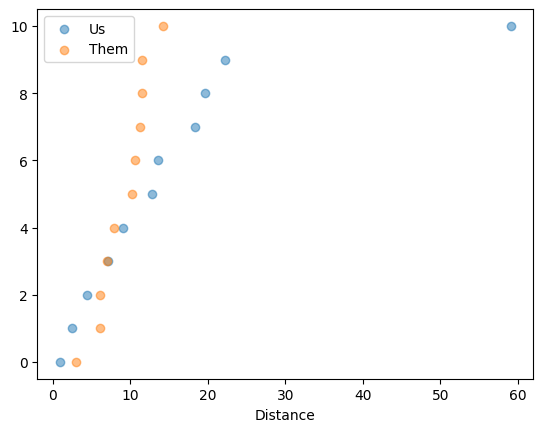

106 1.1667476162392634


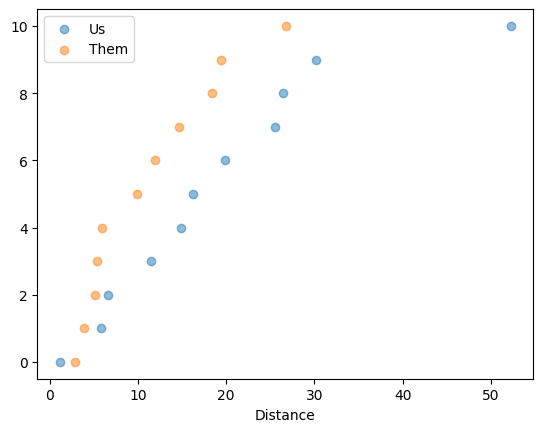

107 0.6711929677819941


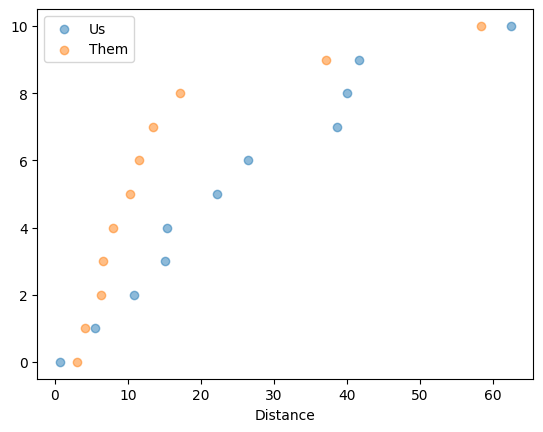

108 0.7256031973468684


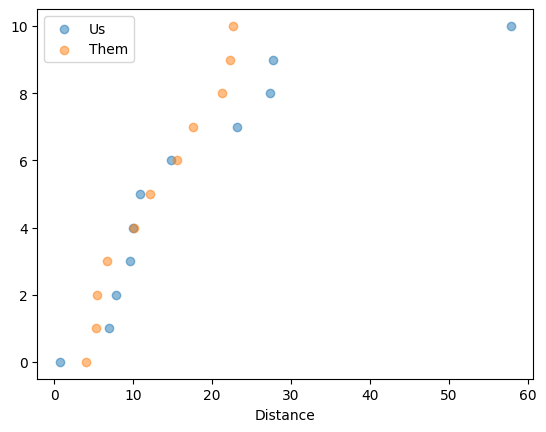

109 0.4850773134254001


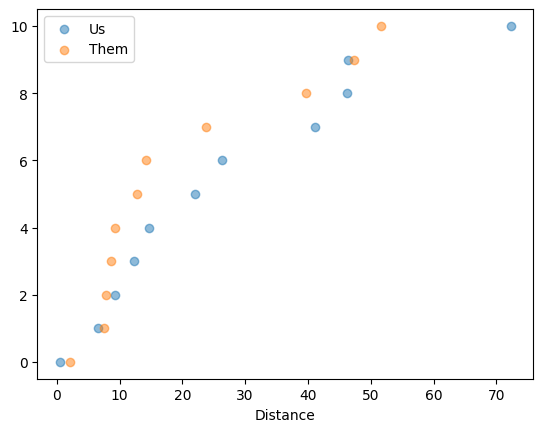

110 0.6592419889539807


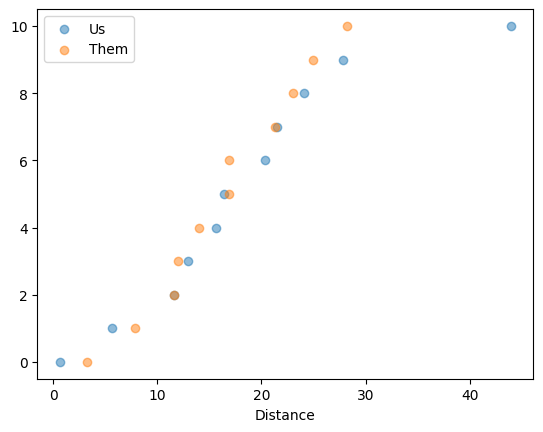

111 1.441006592628917


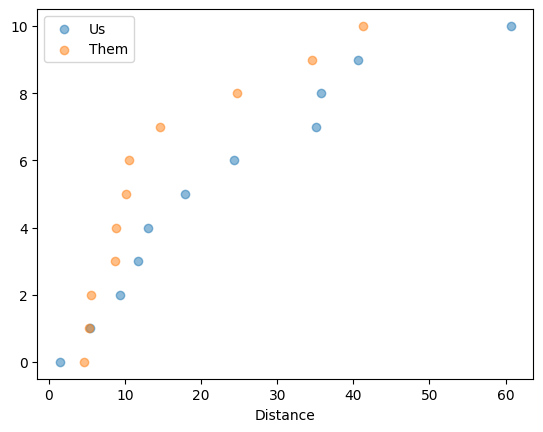

112 0.25079872407968873


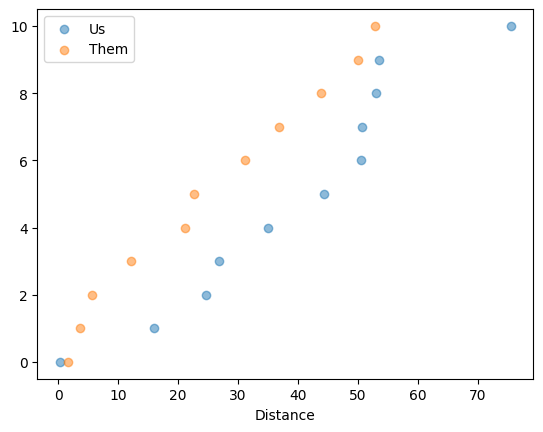

113 1.0301941564578971


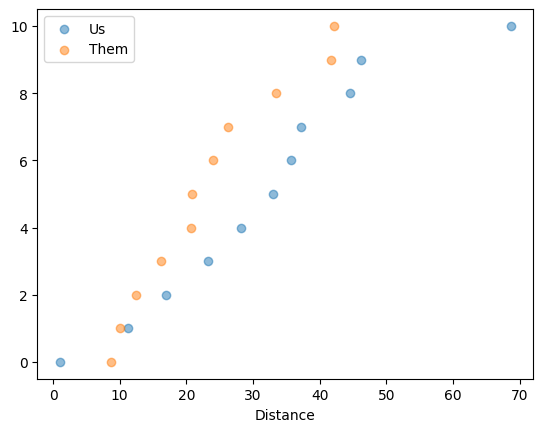

114 0.6706713054842883


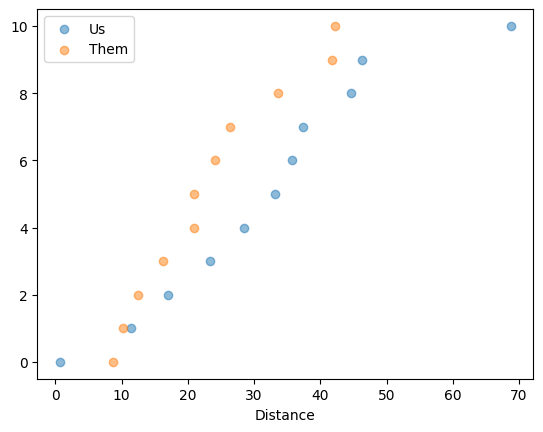

115 0.8080841540334758


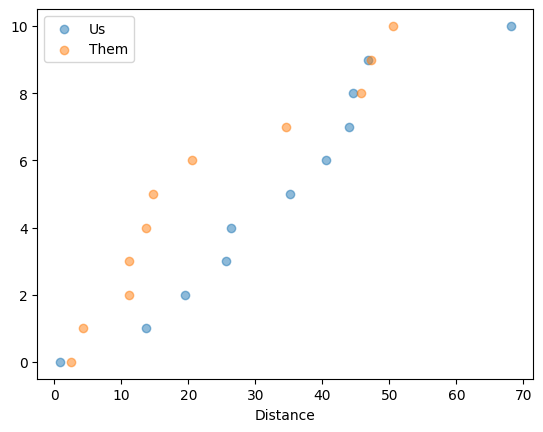

116 1.4612323566086278


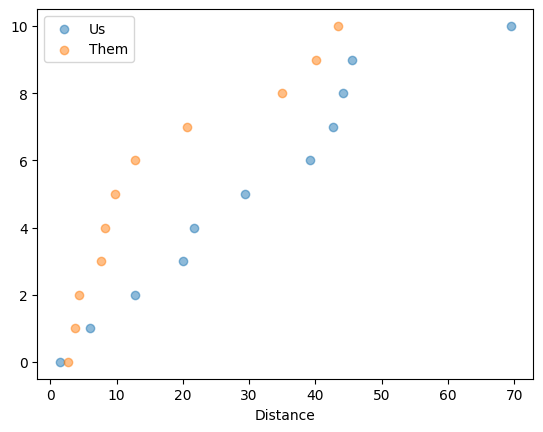

117 0.6706713054842884


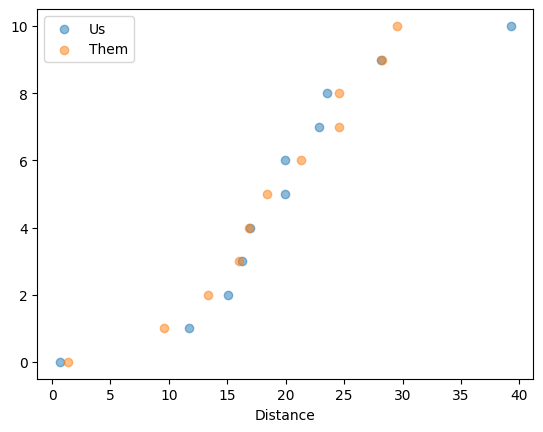

118 0.5724508712544674


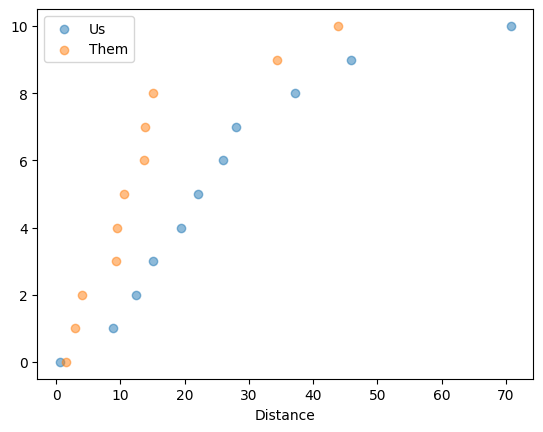

119 0.7542545989253229


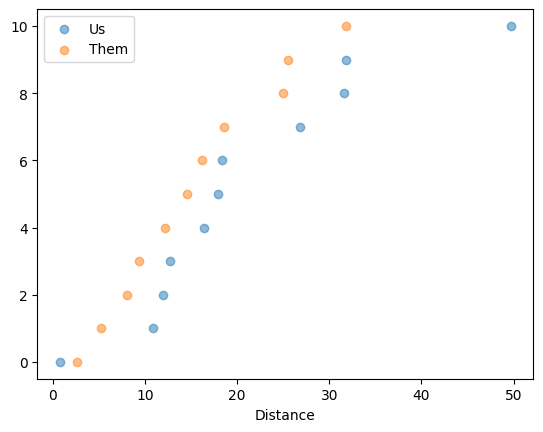

120 0.7638062581571337


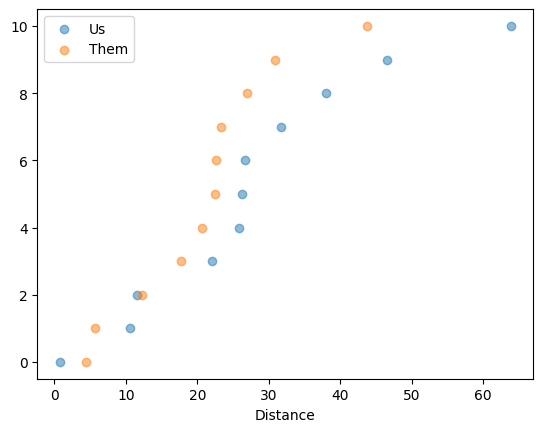

121 3.6565831044842922


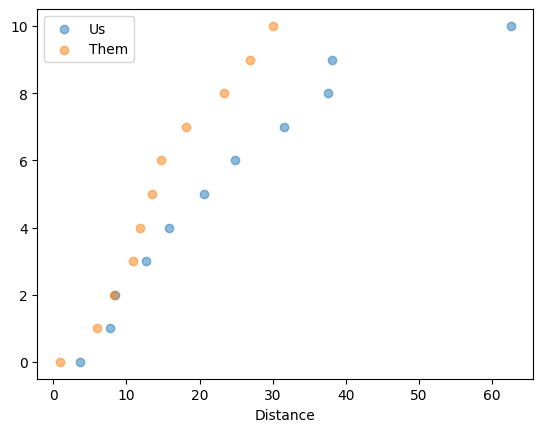

122 1.101362792180669


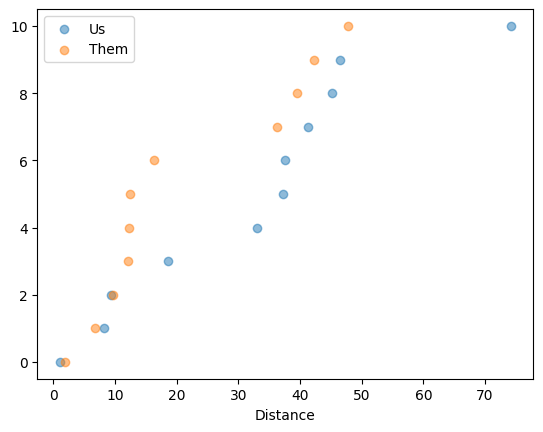

123 0.26172504656604967


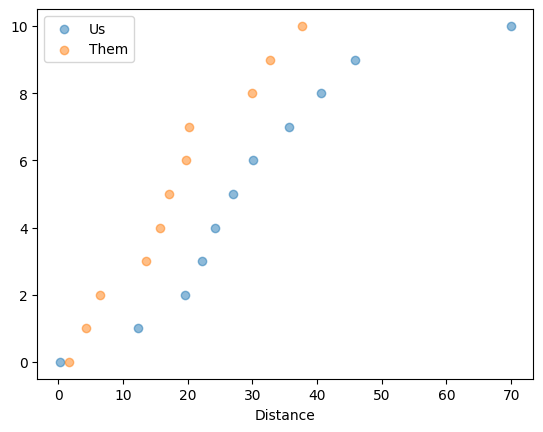

124 0.29546573405388443


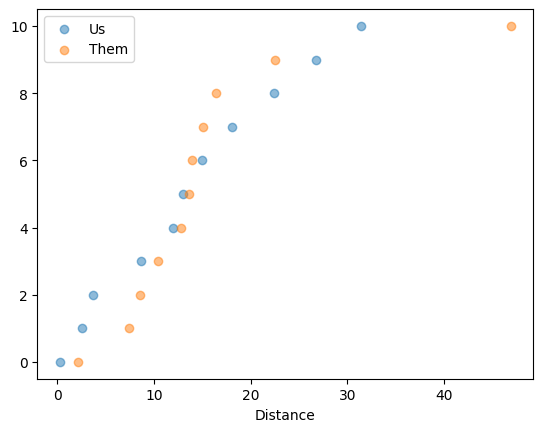

125 0.6129437168288767


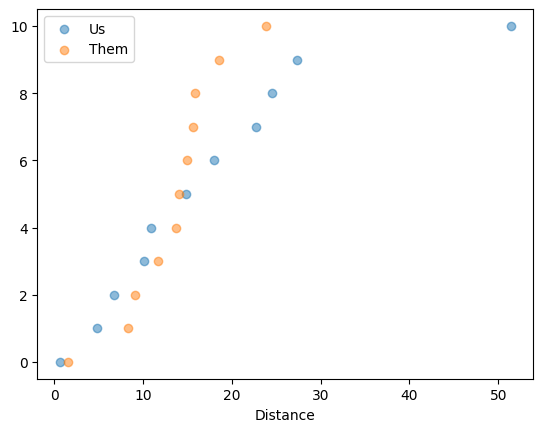

126 0.3736308338453879


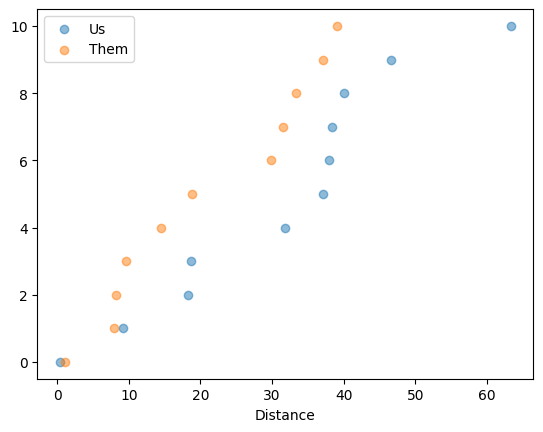

127 0.5913543776789016


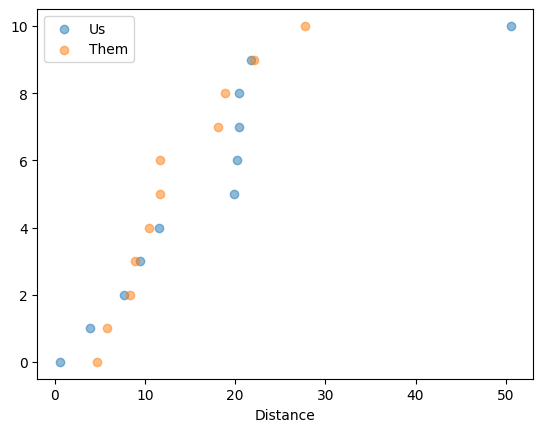

128 1.3479243302203585


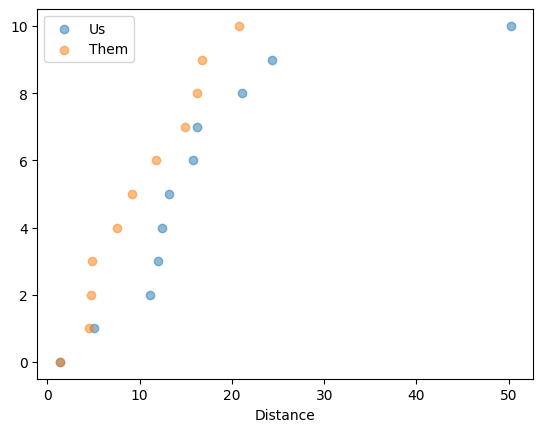

129 1.5255490814785344


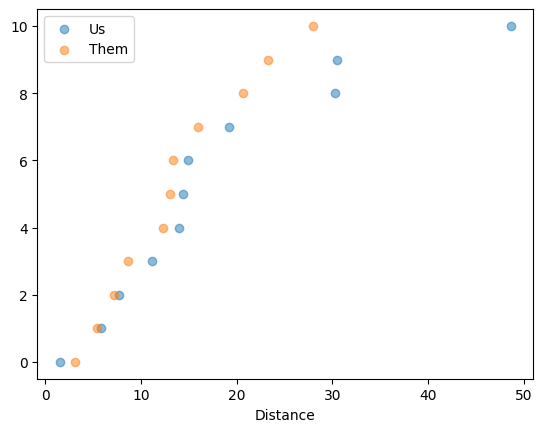

130 0.34525353003264164


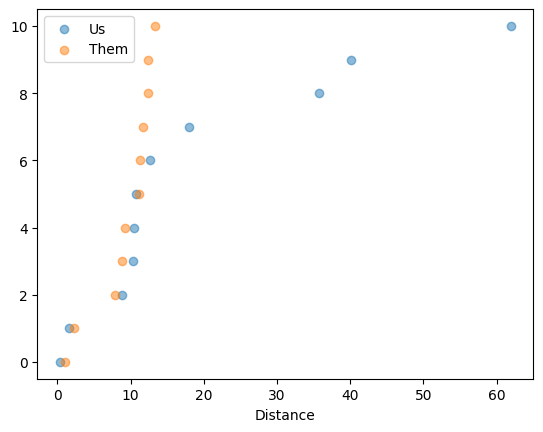

131 1.2720062892926272


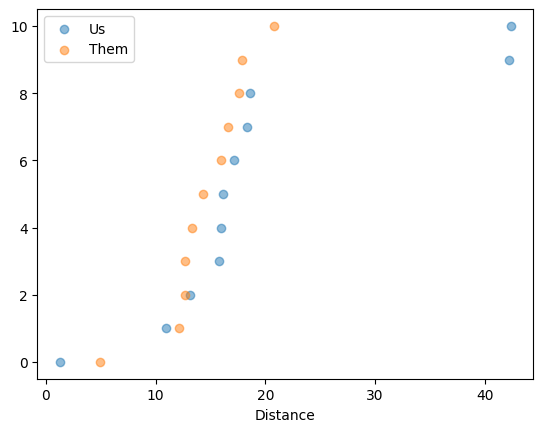

132 0.250798724079686


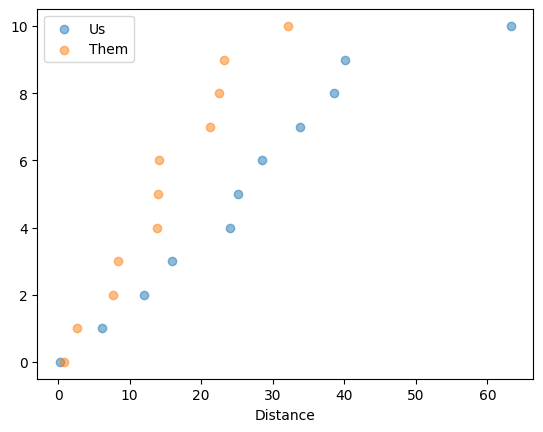

133 0.736817480791546


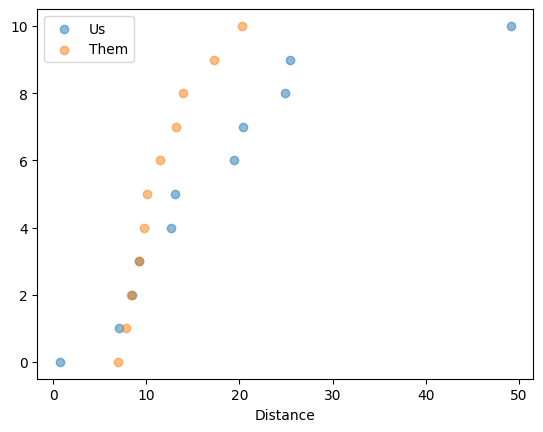

134 0.650538238691625


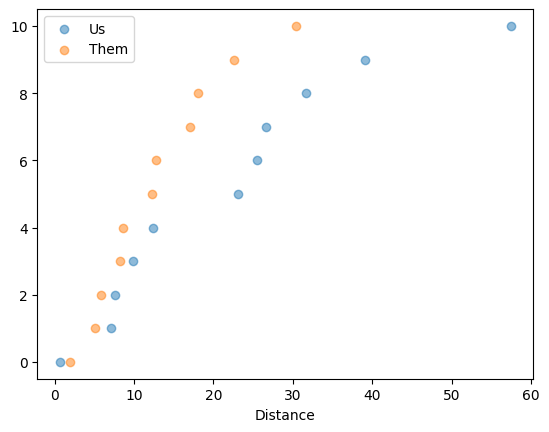

135 1.0241581909060713


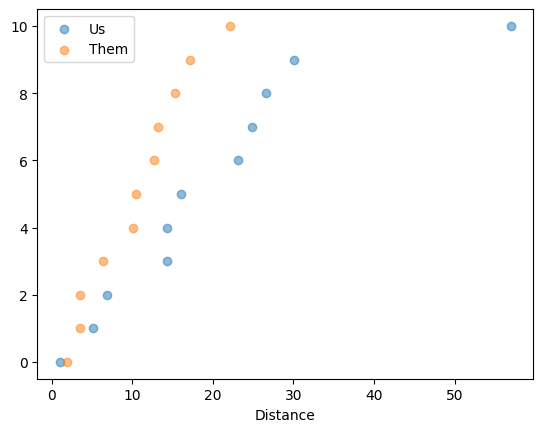

136 0.6488451279003363


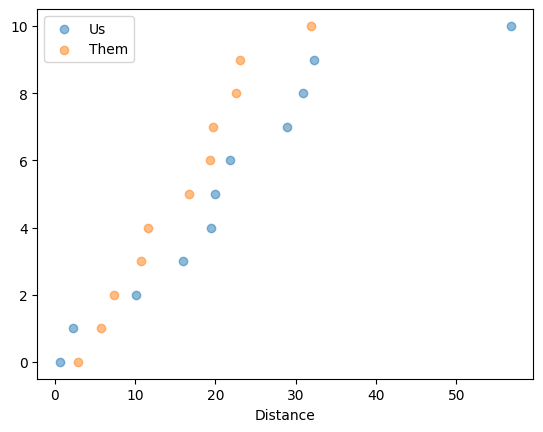

137 0.6824221567329093


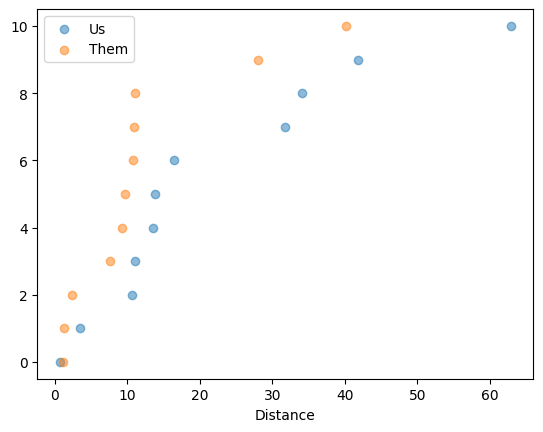

138 0.5869412236331675


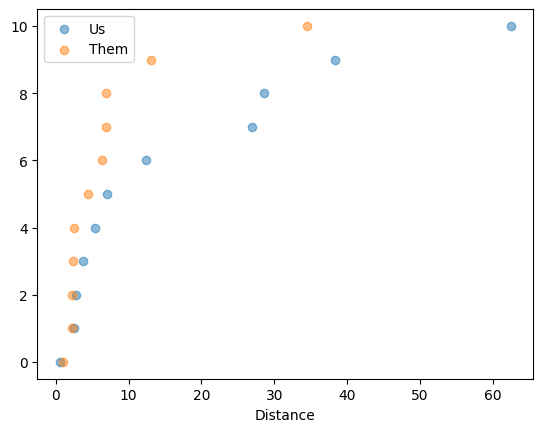

139 0.06000000000000005


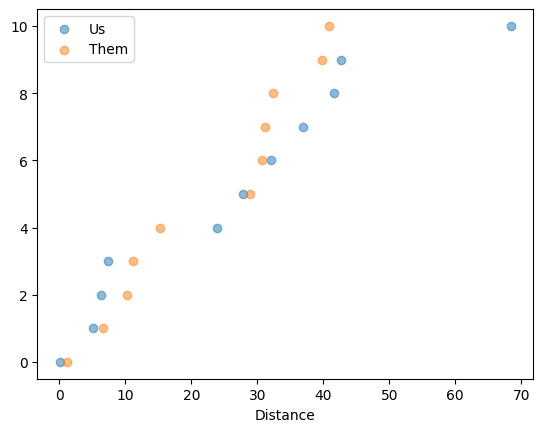

140 0.6095900261651266


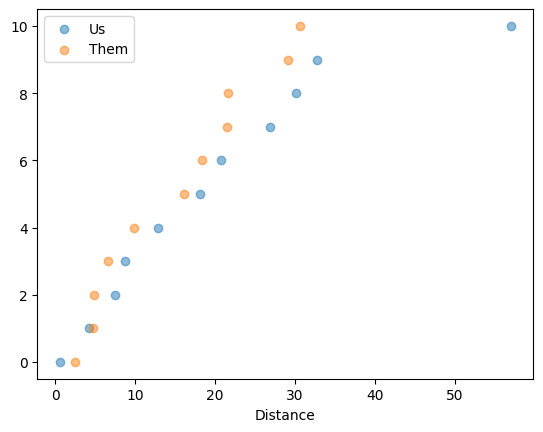

141 0.8030566605165539


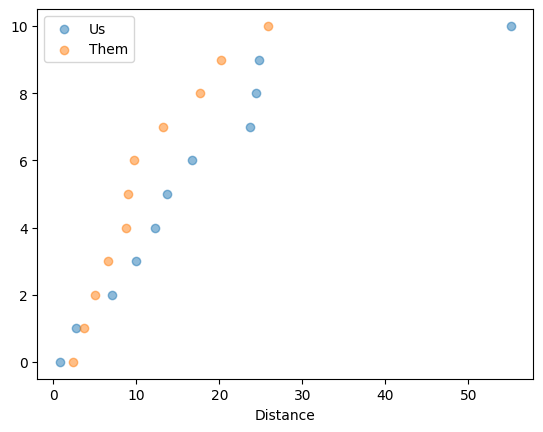

142 1.688845759683221


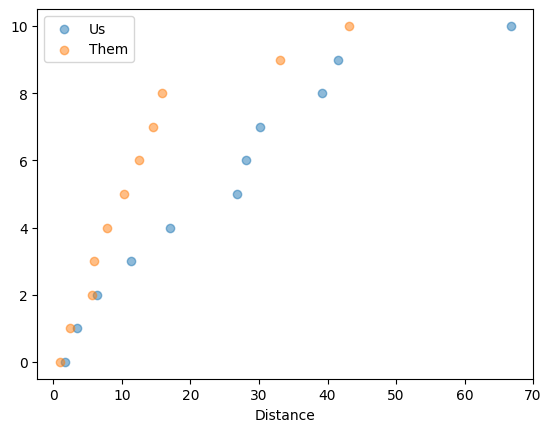

KeyboardInterrupt: 

In [5]:


for ll in range(len(tXG_all.values)):
    closeness_us = [[np.sqrt((x[3]-x[7+i*3])**2 + (x[4]-x[8+i*3])**2) for x in tXG_all.values][ll] for i in range(11)]
    closeness_them = [[np.sqrt((x[3]-x[40+i*3])**2 + (x[4]-x[41+i*3])**2) for x in tXG_all.values][ll] for i in range(11)]
    print(ll, min(closeness_us))

    plt.scatter(closeness_us, range(11), alpha=0.5, label=f'Us')
    plt.scatter(closeness_them, range(11), alpha=0.5,label=f'Them')	
    plt.xlabel('Distance')
    plt.legend()
    plt.show()
